# **scScope**

#Data : Atlas of human blood dendritic cells and monocytes

Implementation pipeline of scScope model from scdeep package
The pipline consists of the foloowing :
* Loading the data and building a AnnData from the counts data nad metadata
* Preprocessing(quality filtering) and training the scScope model
* Comapring the quality of data before and after the application of model
* Down stream Analysis - PCA, UMAP, Clustering analysis
* Additional visualizations






In [ ]:
!pip install scdeep

In [ ]:
!pip install -q scanpy
!pip install -q phenograph

     |████████████████████████████████| 7.2MB 2.8MB/s 
     |████████████████████████████████| 122kB 42.0MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 163kB 2.8MB/s 
     |████████████████████████████████| 2.4MB 8.8MB/s 
     |████████████████████████████████| 3.2MB 23.7MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import torch
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import scdeep 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Constructing AnnData using the two csv files


In [ ]:
count_dataframe = pd.read_csv('expression_matrix_tpm.txt', sep="\t", header=0, index_col=0) 
cd=count_dataframe.T

In [ ]:
metadata_dataframe = pd.read_csv('metadata.txt', sep="\t", header=0,index_col=0)
metadata_dataframe=metadata_dataframe[1:]

In [ ]:
metadata_dataframe.index=cd.index

In [ ]:
adata=sc.AnnData(X=cd,obs=metadata_dataframe)

In [ ]:
adata.shape

(1078, 26593)

In [ ]:
adata1=adata.copy()

In [ ]:
#import phenograph
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score


-----
#Filtering out only the top 1000 highly expressed genes

In [ ]:
sc.pp.highly_variable_genes(adata1, n_top_genes=1000, subset=True)

In [ ]:
adata1.X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.5173227 , 0.90421814, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.2612978 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.76001   , 1.1999648 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.2383742 , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
adata1.shape

(1078, 1000)

In [ ]:
gene_expression = adata1.copy()
gene_expression = gene_expression.X

In [ ]:
from scdeep import scScope

In [ ]:
gene_expression_dataset = scdeep.dataset.GeneExpressionDataset()
gene_expression_dataset.from_data(gene_expression)


----
Initailising the model and traning it on "adata"

In [ ]:
model = scScope.scScope(gene_expression_dataset.data, [], [], 50, exp_batch_input=[])
trainer = scScope.scScopeTrainer(model, gene_expression_dataset, batch_size=64)

training:   0%|          | 0/175 [00:00<?, ?it/s]

latent_layer.linear.weight torch.Size([50, 1000])
latent_layer.linear.bias torch.Size([50])
output_layer.linear.weight torch.Size([1000, 50])
output_layer.linear.bias torch.Size([1000])
batch_effect_layer.weight torch.Size([1000, 1])
imputation_model.0.linear.weight torch.Size([64, 1000])
imputation_model.0.linear.bias torch.Size([64])
imputation_model.1.linear.weight torch.Size([1000, 64])
imputation_model.1.linear.bias torch.Size([1000])

Epoch: 1



training:   1%|          | 1/175 [00:00<01:29,  1.93it/s]

Iteration: 0 Loss: 735.4841
Iteration: 1 Loss: 699.9905
Iteration: 2 Loss: 696.0698
Iteration: 3 Loss: 699.2567
Iteration: 4 Loss: 669.9418
Iteration: 5 Loss: 662.6966
Iteration: 6 Loss: 666.1432
Iteration: 7 Loss: 669.6426
Iteration: 8 Loss: 635.3374
Iteration: 9 Loss: 641.4150
Iteration: 10 Loss: 645.7836
Iteration: 11 Loss: 640.1155
Iteration: 12 Loss: 630.2023
Iteration: 13 Loss: 423.0736

Validation Loss: 556.7302


Epoch: 2

Iteration: 0 Loss: 616.3700
Iteration: 1 Loss: 606.1853
Iteration: 2 Loss: 625.6924
Iteration: 3 Loss: 593.1057
Iteration: 4 Loss: 590.1484
Iteration: 5 Loss: 575.3073
Iteration: 6 Loss: 577.6123
Iteration: 7 Loss: 565.4071
Iteration: 8 Loss: 579.3973
Iteration: 9 Loss: 562.8607
Iteration: 10 Loss: 571.4250
Iteration: 11 Loss: 545.5729
Iteration: 12 Loss: 559.7794
Iteration: 13 Loss: 378.7670

Validation Loss: 480.6175


Epoch: 3

Iteration: 0 Loss: 534.9719
Iteration: 1 Loss: 510.5096
Iteration: 2 Loss: 516.0159


training:   2%|▏         | 3/175 [00:00<01:07,  2.56it/s]

Iteration: 3 Loss: 526.9762
Iteration: 4 Loss: 520.0976
Iteration: 5 Loss: 506.8724
Iteration: 6 Loss: 507.2273
Iteration: 7 Loss: 497.7896
Iteration: 8 Loss: 501.2982
Iteration: 9 Loss: 496.0555
Iteration: 10 Loss: 484.1471
Iteration: 11 Loss: 476.8850
Iteration: 12 Loss: 471.8901
Iteration: 13 Loss: 337.1101

Validation Loss: 415.1331


Epoch: 4

Iteration: 0 Loss: 463.6847
Iteration: 1 Loss: 455.6588
Iteration: 2 Loss: 435.1924
Iteration: 3 Loss: 460.1576
Iteration: 4 Loss: 451.3365
Iteration: 5 Loss: 448.6812
Iteration: 6 Loss: 431.8012
Iteration: 7 Loss: 424.5878
Iteration: 8 Loss: 435.5513
Iteration: 9 Loss: 415.1221
Iteration: 10 Loss: 423.1517
Iteration: 11 Loss: 426.0165
Iteration: 12 Loss: 404.0281
Iteration: 13 Loss: 285.1338

Validation Loss: 363.6716


Epoch: 5

Iteration: 0 Loss: 408.4149
Iteration: 1 Loss: 390.3725
Iteration: 2 Loss: 413.5793
Iteration: 3 Loss: 384.3162
Iteration: 4 Loss: 381.2491


training:   3%|▎         | 6/175 [00:01<00:42,  3.97it/s]

Iteration: 5 Loss: 400.0388
Iteration: 6 Loss: 378.3823
Iteration: 7 Loss: 377.1816
Iteration: 8 Loss: 382.9454
Iteration: 9 Loss: 387.7413
Iteration: 10 Loss: 366.6053
Iteration: 11 Loss: 375.0671
Iteration: 12 Loss: 354.8837
Iteration: 13 Loss: 249.8610

Validation Loss: 329.2019


Epoch: 6

Iteration: 0 Loss: 355.2985
Iteration: 1 Loss: 348.6454
Iteration: 2 Loss: 365.4105
Iteration: 3 Loss: 363.3203
Iteration: 4 Loss: 352.6840
Iteration: 5 Loss: 371.9310
Iteration: 6 Loss: 342.9038
Iteration: 7 Loss: 344.2171
Iteration: 8 Loss: 357.1303
Iteration: 9 Loss: 342.8637
Iteration: 10 Loss: 357.6377
Iteration: 11 Loss: 357.0316
Iteration: 12 Loss: 337.3696
Iteration: 13 Loss: 225.5463

Validation Loss: 309.8930


Epoch: 7



training:   4%|▍         | 7/175 [00:01<00:35,  4.67it/s]

Iteration: 0 Loss: 345.6954
Iteration: 1 Loss: 345.9264
Iteration: 2 Loss: 328.8674
Iteration: 3 Loss: 340.9573
Iteration: 4 Loss: 335.0873
Iteration: 5 Loss: 339.3532
Iteration: 6 Loss: 327.5360
Iteration: 7 Loss: 328.6024
Iteration: 8 Loss: 338.3353
Iteration: 9 Loss: 331.9469
Iteration: 10 Loss: 324.7610
Iteration: 11 Loss: 323.7321
Iteration: 12 Loss: 335.0472
Iteration: 13 Loss: 225.5831

Validation Loss: 298.9273


Epoch: 8

Iteration: 0 Loss: 329.0330
Iteration: 1 Loss: 326.6125
Iteration: 2 Loss: 325.9697
Iteration: 3 Loss: 335.3900
Iteration: 4 Loss: 316.2597
Iteration: 5 Loss: 318.2974
Iteration: 6 Loss: 327.3606
Iteration: 7 Loss: 323.8855
Iteration: 8 Loss: 322.7239
Iteration: 9 Loss: 322.3195
Iteration: 10 Loss: 315.1989
Iteration: 11 Loss: 320.0509
Iteration: 12 Loss: 310.5981

training:   5%|▌         | 9/175 [00:01<00:26,  6.19it/s]


Iteration: 13 Loss: 215.0290

Validation Loss: 290.2022


Epoch: 9

Iteration: 0 Loss: 309.0270
Iteration: 1 Loss: 311.0648
Iteration: 2 Loss: 319.7268
Iteration: 3 Loss: 316.2893
Iteration: 4 Loss: 310.2518
Iteration: 5 Loss: 311.7647
Iteration: 6 Loss: 316.8804
Iteration: 7 Loss: 320.0532
Iteration: 8 Loss: 310.4017
Iteration: 9 Loss: 314.3692
Iteration: 10 Loss: 313.7851
Iteration: 11 Loss: 310.9580
Iteration: 12 Loss: 309.2918
Iteration: 13 Loss: 206.5969

Validation Loss: 284.2088


Epoch: 10

Iteration: 0 Loss: 308.8298
Iteration: 1 Loss: 309.9015
Iteration: 2 Loss: 306.4779
Iteration: 3 Loss: 306.3617
Iteration: 4 Loss: 308.9022
Iteration: 5 Loss: 306.0810
Iteration: 6 Loss: 304.4289
Iteration: 7 Loss: 306.3283
Iteration: 8 Loss: 301.5703
Iteration: 9 Loss: 306.9225
Iteration: 10 Loss: 294.8612
Iteration: 11 Loss: 309.1877


training:   6%|▋         | 11/175 [00:01<00:23,  7.10it/s]

Iteration: 12 Loss: 292.1019
Iteration: 13 Loss: 218.4598

Validation Loss: 280.4608


Epoch: 11

Iteration: 0 Loss: 301.5933
Iteration: 1 Loss: 300.3561
Iteration: 2 Loss: 299.7729
Iteration: 3 Loss: 293.8605
Iteration: 4 Loss: 289.6168
Iteration: 5 Loss: 300.8386
Iteration: 6 Loss: 293.3856
Iteration: 7 Loss: 305.7048
Iteration: 8 Loss: 294.1804
Iteration: 9 Loss: 302.4871
Iteration: 10 Loss: 299.5125
Iteration: 11 Loss: 304.1410
Iteration: 12 Loss: 298.7271
Iteration: 13 Loss: 208.9498

Validation Loss: 276.9915


Epoch: 12

Iteration: 0 Loss: 301.7938
Iteration: 1 Loss: 296.5624
Iteration: 2 Loss: 297.6875
Iteration: 3 Loss: 303.1538
Iteration: 4 Loss: 281.2568
Iteration: 5 Loss: 297.0466
Iteration: 6 Loss: 297.7314
Iteration: 7 Loss: 302.5008
Iteration: 8 Loss: 294.4112
Iteration: 9 Loss: 289.4437
Iteration: 10 Loss: 288.0589
Iteration: 11 Loss: 281.8209
Iteration: 12 Loss: 283.6434
Iteration: 13 Loss: 206.8425

Validation Loss: 273.9189


Epoch: 13



training:   8%|▊         | 14/175 [00:01<00:19,  8.30it/s]

Iteration: 0 Loss: 297.9521
Iteration: 1 Loss: 293.3447
Iteration: 2 Loss: 299.0167
Iteration: 3 Loss: 293.8503
Iteration: 4 Loss: 275.6329
Iteration: 5 Loss: 290.1569
Iteration: 6 Loss: 285.7738
Iteration: 7 Loss: 284.1916
Iteration: 8 Loss: 292.3372
Iteration: 9 Loss: 293.1935
Iteration: 10 Loss: 290.2665
Iteration: 11 Loss: 286.5662
Iteration: 12 Loss: 278.0147
Iteration: 13 Loss: 201.1992

Validation Loss: 271.8623


Epoch: 14

Iteration: 0 Loss: 280.5084
Iteration: 1 Loss: 278.9177
Iteration: 2 Loss: 284.9114
Iteration: 3 Loss: 283.8459
Iteration: 4 Loss: 294.6638
Iteration: 5 Loss: 286.0557
Iteration: 6 Loss: 285.5050
Iteration: 7 Loss: 283.2466
Iteration: 8 Loss: 289.8824
Iteration: 9 Loss: 284.4919
Iteration: 10 Loss: 285.1547
Iteration: 11 Loss: 285.5795
Iteration: 12 Loss: 291.0366
Iteration: 13 Loss: 196.0011

Validation Loss: 269.4882


Epoch: 15



training:   9%|▉         | 16/175 [00:02<00:17,  8.94it/s]

Iteration: 0 Loss: 270.5366
Iteration: 1 Loss: 284.7119
Iteration: 2 Loss: 285.3120
Iteration: 3 Loss: 284.3543
Iteration: 4 Loss: 275.0285
Iteration: 5 Loss: 282.4011
Iteration: 6 Loss: 269.8390
Iteration: 7 Loss: 286.2559
Iteration: 8 Loss: 292.5511
Iteration: 9 Loss: 274.3066
Iteration: 10 Loss: 290.0148
Iteration: 11 Loss: 284.4276
Iteration: 12 Loss: 294.1647
Iteration: 13 Loss: 181.5289

Validation Loss: 265.9382


Epoch: 16

Iteration: 0 Loss: 266.7926
Iteration: 1 Loss: 285.8531
Iteration: 2 Loss: 273.8419
Iteration: 3 Loss: 283.4015
Iteration: 4 Loss: 287.1815
Iteration: 5 Loss: 276.9907
Iteration: 6 Loss: 279.5767
Iteration: 7 Loss: 284.8150
Iteration: 8 Loss: 272.5776
Iteration: 9 Loss: 274.0115
Iteration: 10 Loss: 283.2246
Iteration: 11 Loss: 280.1187
Iteration: 12 Loss: 274.0957
Iteration: 13 Loss: 197.5722

Validation Loss: 264.4548


Epoch: 17

Iteration: 0 Loss: 281.8181
Iteration: 1 Loss: 276.0490
Iteration: 2 Loss: 277.8507
Iteration: 3 Loss: 279.9755
Iteration: 4 Los

training:  10%|█         | 18/175 [00:02<00:16,  9.55it/s]

Iteration: 5 Loss: 271.0286
Iteration: 6 Loss: 270.7296
Iteration: 7 Loss: 270.2275
Iteration: 8 Loss: 269.0511
Iteration: 9 Loss: 280.9008
Iteration: 10 Loss: 284.9030
Iteration: 11 Loss: 277.0038
Iteration: 12 Loss: 270.5491
Iteration: 13 Loss: 199.8872

Validation Loss: 263.6189


Epoch: 18

Iteration: 0 Loss: 282.1039
Iteration: 1 Loss: 275.8040
Iteration: 2 Loss: 269.0385
Iteration: 3 Loss: 265.1976
Iteration: 4 Loss: 270.8863
Iteration: 5 Loss: 281.3016
Iteration: 6 Loss: 273.3787
Iteration: 7 Loss: 264.3925
Iteration: 8 Loss: 275.9425
Iteration: 9 Loss: 265.3633
Iteration: 10 Loss: 272.2802
Iteration: 11 Loss: 279.5833
Iteration: 12 Loss: 280.9799
Iteration: 13 Loss: 187.5547

Validation Loss: 261.3255


Epoch: 19

Iteration: 0 Loss: 273.3458
Iteration: 1 Loss: 288.8438
Iteration: 2 Loss: 264.3846
Iteration: 3 Loss: 282.5427
Iteration: 4 Loss: 267.5226
Iteration: 5 Loss: 272.1146
Iteration: 6 Loss: 268.1231
Iteration: 7 Loss: 272.6815
Iteration: 8 Loss: 269.6118
Iteration: 9 Los

training:  11%|█▏        | 20/175 [00:02<00:15,  9.75it/s]

Iteration: 10 Loss: 264.8014
Iteration: 11 Loss: 267.5270
Iteration: 12 Loss: 266.0718
Iteration: 13 Loss: 190.3791

Validation Loss: 261.8643


Epoch: 20

Iteration: 0 Loss: 269.8214
Iteration: 1 Loss: 271.9764
Iteration: 2 Loss: 269.5995
Iteration: 3 Loss: 263.1045
Iteration: 4 Loss: 262.2113
Iteration: 5 Loss: 265.6952
Iteration: 6 Loss: 273.4840
Iteration: 7 Loss: 272.1431
Iteration: 8 Loss: 264.9105
Iteration: 9 Loss: 253.8699
Iteration: 10 Loss: 281.0133
Iteration: 11 Loss: 268.7010
Iteration: 12 Loss: 276.1437
Iteration: 13 Loss: 188.7318

Validation Loss: 261.3905


Epoch: 21

Iteration: 0 Loss: 268.2773
Iteration: 1 Loss: 259.5443
Iteration: 2 Loss: 263.0101
Iteration: 3 Loss: 267.8130
Iteration: 4 Loss: 262.8123
Iteration: 5 Loss: 258.9914
Iteration: 6 Loss: 255.4714
Iteration: 7 Loss: 272.4386
Iteration: 8 Loss: 267.6668
Iteration: 9 Loss: 264.9261
Iteration: 10 Loss: 267.4828
Iteration: 11 Loss: 271.5359
Iteration: 12 Loss: 288.1007
Iteration: 13 Loss: 177.9277

training:  13%|█▎        | 22/175 [00:02<00:15, 10.13it/s]



Validation Loss: 258.2331


Epoch: 22

Iteration: 0 Loss: 267.7917
Iteration: 1 Loss: 267.3874
Iteration: 2 Loss: 260.0044
Iteration: 3 Loss: 267.1691
Iteration: 4 Loss: 260.4962
Iteration: 5 Loss: 271.7276
Iteration: 6 Loss: 268.4503
Iteration: 7 Loss: 256.3257
Iteration: 8 Loss: 271.6949
Iteration: 9 Loss: 262.6796
Iteration: 10 Loss: 271.2785
Iteration: 11 Loss: 256.1037
Iteration: 12 Loss: 255.1520
Iteration: 13 Loss: 183.0441

Validation Loss: 259.6628


Epoch: 23

Iteration: 0 Loss: 261.5395
Iteration: 1 Loss: 267.5734
Iteration: 2 Loss: 262.9842
Iteration: 3 Loss: 256.6941
Iteration: 4 Loss: 269.0655
Iteration: 5 Loss: 256.6317
Iteration: 6 Loss: 257.1487
Iteration: 7 Loss: 269.6298
Iteration: 8 Loss: 253.9698
Iteration: 9 Loss: 256.1480
Iteration: 10 Loss: 260.2645
Iteration: 11 Loss: 273.6940
Iteration: 12 Loss: 265.1282
Iteration: 13 Loss: 185.6398

Validation Loss: 257.4559


Epoch: 24

Iteration: 0 Loss: 273.0356


training:  14%|█▎        | 24/175 [00:02<00:14, 10.13it/s]

Iteration: 1 Loss: 263.1113
Iteration: 2 Loss: 255.9164
Iteration: 3 Loss: 280.5790
Iteration: 4 Loss: 268.4814
Iteration: 5 Loss: 265.7077
Iteration: 6 Loss: 249.4053
Iteration: 7 Loss: 249.7020
Iteration: 8 Loss: 254.5858
Iteration: 9 Loss: 259.2101
Iteration: 10 Loss: 269.3086
Iteration: 11 Loss: 252.4359
Iteration: 12 Loss: 246.1393
Iteration: 13 Loss: 181.9321

Validation Loss: 256.3954


Epoch: 25

Iteration: 0 Loss: 263.2800
Iteration: 1 Loss: 259.9843
Iteration: 2 Loss: 251.8788
Iteration: 3 Loss: 257.2710
Iteration: 4 Loss: 253.8655
Iteration: 5 Loss: 252.6665
Iteration: 6 Loss: 266.8418
Iteration: 7 Loss: 269.9182
Iteration: 8 Loss: 258.6241
Iteration: 9 Loss: 260.2490
Iteration: 10 Loss: 253.2268
Iteration: 11 Loss: 258.6701
Iteration: 12 Loss: 257.1324
Iteration: 13 Loss: 185.9320

Validation Loss: 255.9777


Epoch: 26

Iteration: 0 Loss: 257.2851
Iteration: 1 Loss: 251.6181
Iteration: 2 Loss: 257.2659
Iteration: 3 Loss: 262.8578


training:  15%|█▍        | 26/175 [00:02<00:14, 10.40it/s]

Iteration: 4 Loss: 257.7209
Iteration: 5 Loss: 252.3169
Iteration: 6 Loss: 267.1796
Iteration: 7 Loss: 257.0437
Iteration: 8 Loss: 251.9271
Iteration: 9 Loss: 252.8892
Iteration: 10 Loss: 269.0218
Iteration: 11 Loss: 257.2941
Iteration: 12 Loss: 256.0771
Iteration: 13 Loss: 173.9168

Validation Loss: 255.5099


Epoch: 27

Iteration: 0 Loss: 253.4953
Iteration: 1 Loss: 268.1940
Iteration: 2 Loss: 266.4740
Iteration: 3 Loss: 250.0450
Iteration: 4 Loss: 253.6727
Iteration: 5 Loss: 255.0625
Iteration: 6 Loss: 247.1678
Iteration: 7 Loss: 260.4136
Iteration: 8 Loss: 258.8150
Iteration: 9 Loss: 248.3735
Iteration: 10 Loss: 255.3003
Iteration: 11 Loss: 249.0004
Iteration: 12 Loss: 253.9329
Iteration: 13 Loss: 186.5537

Validation Loss: 254.8008


Epoch: 28

Iteration: 0 Loss: 255.8628
Iteration: 1 Loss: 248.1122
Iteration: 2 Loss: 251.8747
Iteration: 3 Loss: 254.9118
Iteration: 4 Loss: 244.1226
Iteration: 5 Loss: 254.4724
Iteration: 6 Loss: 247.3063
Iteration: 7 Loss: 253.7856


training:  16%|█▌        | 28/175 [00:03<00:13, 10.52it/s]

Iteration: 8 Loss: 252.9969
Iteration: 9 Loss: 267.9839
Iteration: 10 Loss: 246.9063
Iteration: 11 Loss: 267.5547
Iteration: 12 Loss: 258.9156
Iteration: 13 Loss: 177.3869

Validation Loss: 254.5683


Epoch: 29

Iteration: 0 Loss: 247.0511
Iteration: 1 Loss: 241.2539
Iteration: 2 Loss: 249.1051
Iteration: 3 Loss: 266.6511
Iteration: 4 Loss: 255.7475
Iteration: 5 Loss: 251.9664
Iteration: 6 Loss: 250.4450
Iteration: 7 Loss: 253.6721
Iteration: 8 Loss: 252.9399
Iteration: 9 Loss: 254.1570
Iteration: 10 Loss: 251.6047
Iteration: 11 Loss: 253.4421
Iteration: 12 Loss: 259.0526
Iteration: 13 Loss: 172.2365

Validation Loss: 254.4996


Epoch: 30

Iteration: 0 Loss: 252.3459
Iteration: 1 Loss: 261.5672
Iteration: 2 Loss: 243.6481
Iteration: 3 Loss: 263.9691
Iteration: 4 Loss: 241.6097
Iteration: 5 Loss: 249.4193
Iteration: 6 Loss: 247.8894
Iteration: 7 Loss: 246.0687
Iteration: 8 Loss: 255.2645
Iteration: 9 Loss: 250.6258
Iteration: 10 Loss: 249.7966
Iteration: 11 Loss: 258.0068


training:  17%|█▋        | 30/175 [00:03<00:13, 10.55it/s]

Iteration: 12 Loss: 242.8261
Iteration: 13 Loss: 179.3757

Validation Loss: 253.3295


Epoch: 31

Iteration: 0 Loss: 246.8674
Iteration: 1 Loss: 255.7721
Iteration: 2 Loss: 249.3571
Iteration: 3 Loss: 253.5210
Iteration: 4 Loss: 254.8573
Iteration: 5 Loss: 247.7640
Iteration: 6 Loss: 250.4364
Iteration: 7 Loss: 246.8580
Iteration: 8 Loss: 250.1280
Iteration: 9 Loss: 253.1208
Iteration: 10 Loss: 253.1625
Iteration: 11 Loss: 240.7404
Iteration: 12 Loss: 248.0995
Iteration: 13 Loss: 177.1781

Validation Loss: 252.7327


Epoch: 32

Iteration: 0 Loss: 246.9005
Iteration: 1 Loss: 249.6127
Iteration: 2 Loss: 243.4291
Iteration: 3 Loss: 256.4928
Iteration: 4 Loss: 237.9540
Iteration: 5 Loss: 247.7524
Iteration: 6 Loss: 256.0446
Iteration: 7 Loss: 250.5262
Iteration: 8 Loss: 251.9200
Iteration: 9 Loss: 249.0624
Iteration: 10 Loss: 248.4890
Iteration: 11 Loss: 248.8248
Iteration: 12 Loss: 237.0445
Iteration: 13 Loss: 184.8589


training:  19%|█▉        | 34/175 [00:03<00:13, 10.61it/s]


Validation Loss: 252.0880


Epoch: 33

Iteration: 0 Loss: 250.8425
Iteration: 1 Loss: 246.1633
Iteration: 2 Loss: 256.7031
Iteration: 3 Loss: 235.3484
Iteration: 4 Loss: 251.6944
Iteration: 5 Loss: 239.5495
Iteration: 6 Loss: 244.1175
Iteration: 7 Loss: 241.9191
Iteration: 8 Loss: 250.5516
Iteration: 9 Loss: 258.9995
Iteration: 10 Loss: 243.8822
Iteration: 11 Loss: 247.7429
Iteration: 12 Loss: 239.7147
Iteration: 13 Loss: 178.9916

Validation Loss: 250.4256


Epoch: 34

Iteration: 0 Loss: 247.6335
Iteration: 1 Loss: 243.3879
Iteration: 2 Loss: 244.8370
Iteration: 3 Loss: 239.0786
Iteration: 4 Loss: 245.3228
Iteration: 5 Loss: 244.3879
Iteration: 6 Loss: 248.1026
Iteration: 7 Loss: 259.6025
Iteration: 8 Loss: 248.3547
Iteration: 9 Loss: 237.4436
Iteration: 10 Loss: 240.8470
Iteration: 11 Loss: 245.4964
Iteration: 12 Loss: 248.3577
Iteration: 13 Loss: 172.6480

Validation Loss: 251.1778


Epoch: 35

Iteration: 0 Loss: 236.3430


training:  21%|██        | 36/175 [00:03<00:12, 10.80it/s]

Iteration: 1 Loss: 240.9318
Iteration: 2 Loss: 250.4428
Iteration: 3 Loss: 241.7981
Iteration: 4 Loss: 242.4425
Iteration: 5 Loss: 248.7470
Iteration: 6 Loss: 247.1694
Iteration: 7 Loss: 242.7859
Iteration: 8 Loss: 241.9577
Iteration: 9 Loss: 248.5210
Iteration: 10 Loss: 237.0080
Iteration: 11 Loss: 246.4706
Iteration: 12 Loss: 244.1367
Iteration: 13 Loss: 182.1297

Validation Loss: 250.8331


Epoch: 36

Iteration: 0 Loss: 248.0781
Iteration: 1 Loss: 241.8016
Iteration: 2 Loss: 249.7649
Iteration: 3 Loss: 250.4922
Iteration: 4 Loss: 228.7638
Iteration: 5 Loss: 248.6415
Iteration: 6 Loss: 247.3627
Iteration: 7 Loss: 228.8342
Iteration: 8 Loss: 240.3642
Iteration: 9 Loss: 230.7850
Iteration: 10 Loss: 245.9373
Iteration: 11 Loss: 250.4544
Iteration: 12 Loss: 245.2738
Iteration: 13 Loss: 176.7306

Validation Loss: 249.7640


Epoch: 37

Iteration: 0 Loss: 250.8573
Iteration: 1 Loss: 241.8800
Iteration: 2 Loss: 249.1790
Iteration: 3 Loss: 243.3330
Iteration: 4 Loss: 245.9244
Iteration: 5 Los

training:  22%|██▏       | 38/175 [00:04<00:12, 10.82it/s]

Iteration: 7 Loss: 228.0844
Iteration: 8 Loss: 236.5379
Iteration: 9 Loss: 248.1452
Iteration: 10 Loss: 231.5598
Iteration: 11 Loss: 251.9025
Iteration: 12 Loss: 243.2870
Iteration: 13 Loss: 165.8326

Validation Loss: 248.2196


Epoch: 38

Iteration: 0 Loss: 245.8978
Iteration: 1 Loss: 236.4852
Iteration: 2 Loss: 238.8414
Iteration: 3 Loss: 225.6291
Iteration: 4 Loss: 223.8414
Iteration: 5 Loss: 244.9462
Iteration: 6 Loss: 242.2448
Iteration: 7 Loss: 238.1148
Iteration: 8 Loss: 243.7036
Iteration: 9 Loss: 244.8666
Iteration: 10 Loss: 234.7454
Iteration: 11 Loss: 238.4843
Iteration: 12 Loss: 241.4207
Iteration: 13 Loss: 172.2236

Validation Loss: 248.5887


Epoch: 39

Iteration: 0 Loss: 239.6787
Iteration: 1 Loss: 235.9546
Iteration: 2 Loss: 245.0567
Iteration: 3 Loss: 234.2211
Iteration: 4 Loss: 235.5214
Iteration: 5 Loss: 235.7368
Iteration: 6 Loss: 239.9595
Iteration: 7 Loss: 231.6190
Iteration: 8 Loss: 239.9232
Iteration: 9 Loss: 231.9516
Iteration: 10 Loss: 244.7843


training:  23%|██▎       | 40/175 [00:04<00:12, 10.93it/s]

Iteration: 11 Loss: 233.5744
Iteration: 12 Loss: 233.2057
Iteration: 13 Loss: 173.9367

Validation Loss: 247.9388


Epoch: 40

Iteration: 0 Loss: 240.6865
Iteration: 1 Loss: 238.0999
Iteration: 2 Loss: 241.1771
Iteration: 3 Loss: 228.6506
Iteration: 4 Loss: 228.6629
Iteration: 5 Loss: 232.6123
Iteration: 6 Loss: 237.5354
Iteration: 7 Loss: 237.0139
Iteration: 8 Loss: 233.7145
Iteration: 9 Loss: 238.3261
Iteration: 10 Loss: 234.9190
Iteration: 11 Loss: 242.8653
Iteration: 12 Loss: 236.4483
Iteration: 13 Loss: 167.4191

Validation Loss: 247.0052


Epoch: 41

Iteration: 0 Loss: 241.7201
Iteration: 1 Loss: 236.4559
Iteration: 2 Loss: 232.2224
Iteration: 3 Loss: 240.8134
Iteration: 4 Loss: 240.3960
Iteration: 5 Loss: 226.3103
Iteration: 6 Loss: 240.4504
Iteration: 7 Loss: 237.5835
Iteration: 8 Loss: 229.2695
Iteration: 9 Loss: 240.9995
Iteration: 10 Loss: 225.3911
Iteration: 11 Loss: 236.6143
Iteration: 12 Loss: 234.7697
Iteration: 13 Loss: 158.7858


training:  24%|██▍       | 42/175 [00:04<00:12, 10.78it/s]


Validation Loss: 247.8848


Epoch: 42

Iteration: 0 Loss: 238.0840
Iteration: 1 Loss: 233.6127
Iteration: 2 Loss: 229.7773
Iteration: 3 Loss: 229.8728
Iteration: 4 Loss: 220.6746
Iteration: 5 Loss: 228.6110
Iteration: 6 Loss: 248.9267
Iteration: 7 Loss: 246.6544
Iteration: 8 Loss: 233.4411
Iteration: 9 Loss: 230.4115
Iteration: 10 Loss: 244.3647
Iteration: 11 Loss: 221.5290
Iteration: 12 Loss: 232.9747
Iteration: 13 Loss: 169.5660

Validation Loss: 246.8958


Epoch: 43

Iteration: 0 Loss: 230.4809
Iteration: 1 Loss: 231.1387
Iteration: 2 Loss: 238.1727
Iteration: 3 Loss: 238.1328
Iteration: 4 Loss: 218.6730
Iteration: 5 Loss: 223.4380
Iteration: 6 Loss: 228.2980
Iteration: 7 Loss: 233.0722
Iteration: 8 Loss: 240.0341
Iteration: 9 Loss: 232.6909
Iteration: 10 Loss: 229.1029
Iteration: 11 Loss: 239.2803
Iteration: 12 Loss: 245.2704
Iteration: 13 Loss: 161.7584

Validation Loss: 246.4039


Epoch: 44

Iteration: 0 Loss: 223.8483


training:  25%|██▌       | 44/175 [00:04<00:12, 10.83it/s]

Iteration: 1 Loss: 232.8205
Iteration: 2 Loss: 235.6286
Iteration: 3 Loss: 227.3203
Iteration: 4 Loss: 240.3869
Iteration: 5 Loss: 227.0467
Iteration: 6 Loss: 232.3669
Iteration: 7 Loss: 233.7577
Iteration: 8 Loss: 233.8128
Iteration: 9 Loss: 233.6155
Iteration: 10 Loss: 221.5698
Iteration: 11 Loss: 232.5847
Iteration: 12 Loss: 236.5072
Iteration: 13 Loss: 165.2749

Validation Loss: 246.5882


Epoch: 45

Iteration: 0 Loss: 227.5285
Iteration: 1 Loss: 227.4425
Iteration: 2 Loss: 234.8726
Iteration: 3 Loss: 223.2164
Iteration: 4 Loss: 231.5181
Iteration: 5 Loss: 232.1350
Iteration: 6 Loss: 248.8091
Iteration: 7 Loss: 229.3409
Iteration: 8 Loss: 220.9558
Iteration: 9 Loss: 227.8261
Iteration: 10 Loss: 232.8238
Iteration: 11 Loss: 235.6470
Iteration: 12 Loss: 231.4093
Iteration: 13 Loss: 158.4504

Validation Loss: 247.0637


Epoch: 46

Iteration: 0 Loss: 227.5039
Iteration: 1 Loss: 228.6900
Iteration: 2 Loss: 238.0286
Iteration: 3 Loss: 231.9382
Iteration: 4 Loss: 219.0310
Iteration: 5 Los

training:  26%|██▋       | 46/175 [00:04<00:11, 10.94it/s]

Iteration: 7 Loss: 234.8067
Iteration: 8 Loss: 224.1312
Iteration: 9 Loss: 231.7820
Iteration: 10 Loss: 238.8394
Iteration: 11 Loss: 231.7265
Iteration: 12 Loss: 227.7511
Iteration: 13 Loss: 149.7463

Validation Loss: 245.9611


Epoch: 47

Iteration: 0 Loss: 225.4208
Iteration: 1 Loss: 224.1251
Iteration: 2 Loss: 220.5002
Iteration: 3 Loss: 232.2090
Iteration: 4 Loss: 226.4913
Iteration: 5 Loss: 230.6652
Iteration: 6 Loss: 230.2882
Iteration: 7 Loss: 230.1705
Iteration: 8 Loss: 234.5798
Iteration: 9 Loss: 228.6561
Iteration: 10 Loss: 236.4165
Iteration: 11 Loss: 219.7104
Iteration: 12 Loss: 231.9287
Iteration: 13 Loss: 157.5972

Validation Loss: 244.5318


Epoch: 48

Iteration: 0 Loss: 219.7798
Iteration: 1 Loss: 228.8833
Iteration: 2 Loss: 228.1496
Iteration: 3 Loss: 217.8821
Iteration: 4 Loss: 232.4834
Iteration: 5 Loss: 228.9989
Iteration: 6 Loss: 229.3666
Iteration: 7 Loss: 226.6758
Iteration: 8 Loss: 232.8343
Iteration: 9 Loss: 226.8906
Iteration: 10 Loss: 231.5265
Iteration: 11 L

training:  27%|██▋       | 48/175 [00:05<00:11, 11.03it/s]

Iteration: 13 Loss: 159.7578

Validation Loss: 244.5395


Epoch: 49

Iteration: 0 Loss: 226.5912
Iteration: 1 Loss: 232.2307
Iteration: 2 Loss: 222.5067
Iteration: 3 Loss: 230.8521
Iteration: 4 Loss: 223.7107
Iteration: 5 Loss: 234.2911
Iteration: 6 Loss: 227.2495
Iteration: 7 Loss: 225.0910
Iteration: 8 Loss: 229.8568
Iteration: 9 Loss: 219.6231
Iteration: 10 Loss: 228.4922
Iteration: 11 Loss: 217.8054
Iteration: 12 Loss: 222.5927
Iteration: 13 Loss: 165.3202

Validation Loss: 246.8929


Epoch: 50

Iteration: 0 Loss: 219.5078
Iteration: 1 Loss: 215.3342
Iteration: 2 Loss: 231.9095
Iteration: 3 Loss: 222.2237
Iteration: 4 Loss: 240.1693
Iteration: 5 Loss: 229.6109
Iteration: 6 Loss: 215.0093
Iteration: 7 Loss: 216.2525
Iteration: 8 Loss: 222.5365
Iteration: 9 Loss: 232.6036
Iteration: 10 Loss: 228.4401
Iteration: 11 Loss: 223.2731
Iteration: 12 Loss: 226.1951
Iteration: 13 Loss: 149.0909


training:  30%|██▉       | 52/175 [00:05<00:11, 10.75it/s]


Validation Loss: 244.1787


Epoch: 51

Iteration: 0 Loss: 228.5232
Iteration: 1 Loss: 222.6770
Iteration: 2 Loss: 215.7897
Iteration: 3 Loss: 214.7082
Iteration: 4 Loss: 226.0076
Iteration: 5 Loss: 228.1247
Iteration: 6 Loss: 222.9406
Iteration: 7 Loss: 233.2977
Iteration: 8 Loss: 227.5707
Iteration: 9 Loss: 218.9339
Iteration: 10 Loss: 216.4422
Iteration: 11 Loss: 220.5269
Iteration: 12 Loss: 227.9955
Iteration: 13 Loss: 152.8182

Validation Loss: 243.5774


Epoch: 52

Iteration: 0 Loss: 225.0150
Iteration: 1 Loss: 212.5886
Iteration: 2 Loss: 227.3331
Iteration: 3 Loss: 220.5818
Iteration: 4 Loss: 215.8198
Iteration: 5 Loss: 220.1731
Iteration: 6 Loss: 225.7372
Iteration: 7 Loss: 220.8885
Iteration: 8 Loss: 220.5817
Iteration: 9 Loss: 223.9916
Iteration: 10 Loss: 219.8575
Iteration: 11 Loss: 232.0283
Iteration: 12 Loss: 224.9429
Iteration: 13 Loss: 154.5044

Validation Loss: 243.6107


Epoch: 53

Iteration: 0 Loss: 218.9014


training:  31%|███       | 54/175 [00:05<00:11, 10.77it/s]

Iteration: 1 Loss: 216.2841
Iteration: 2 Loss: 222.3725
Iteration: 3 Loss: 226.8808
Iteration: 4 Loss: 222.5411
Iteration: 5 Loss: 227.5618
Iteration: 6 Loss: 212.2152
Iteration: 7 Loss: 221.5593
Iteration: 8 Loss: 221.9637
Iteration: 9 Loss: 214.7852
Iteration: 10 Loss: 221.3896
Iteration: 11 Loss: 219.3243
Iteration: 12 Loss: 231.4415
Iteration: 13 Loss: 156.1901

Validation Loss: 243.8583


Epoch: 54

Iteration: 0 Loss: 220.0448
Iteration: 1 Loss: 224.9164
Iteration: 2 Loss: 230.9683
Iteration: 3 Loss: 216.0028
Iteration: 4 Loss: 212.8907
Iteration: 5 Loss: 219.6288
Iteration: 6 Loss: 214.0497
Iteration: 7 Loss: 218.4002
Iteration: 8 Loss: 224.0609
Iteration: 9 Loss: 213.8254
Iteration: 10 Loss: 221.9914
Iteration: 11 Loss: 224.8531
Iteration: 12 Loss: 213.7295
Iteration: 13 Loss: 166.4640

Validation Loss: 244.3266


Epoch: 55

Iteration: 0 Loss: 218.5540
Iteration: 1 Loss: 203.7474
Iteration: 2 Loss: 209.4291
Iteration: 3 Loss: 217.5761


training:  32%|███▏      | 56/175 [00:05<00:11, 10.79it/s]

Iteration: 4 Loss: 228.9703
Iteration: 5 Loss: 224.1829
Iteration: 6 Loss: 216.5518
Iteration: 7 Loss: 213.6188
Iteration: 8 Loss: 229.8183
Iteration: 9 Loss: 221.1630
Iteration: 10 Loss: 226.3017
Iteration: 11 Loss: 224.5214
Iteration: 12 Loss: 219.7771
Iteration: 13 Loss: 151.6093

Validation Loss: 243.7647


Epoch: 56

Iteration: 0 Loss: 219.9567
Iteration: 1 Loss: 215.0055
Iteration: 2 Loss: 212.5111
Iteration: 3 Loss: 217.3583
Iteration: 4 Loss: 212.6060
Iteration: 5 Loss: 214.7812
Iteration: 6 Loss: 223.5587
Iteration: 7 Loss: 211.6955
Iteration: 8 Loss: 233.6666
Iteration: 9 Loss: 216.4285
Iteration: 10 Loss: 229.0082
Iteration: 11 Loss: 228.1057
Iteration: 12 Loss: 216.1354
Iteration: 13 Loss: 139.0897

Validation Loss: 244.4194


Epoch: 57

Iteration: 0 Loss: 213.3169
Iteration: 1 Loss: 208.2393
Iteration: 2 Loss: 216.3769
Iteration: 3 Loss: 231.0278
Iteration: 4 Loss: 215.9303
Iteration: 5 Loss: 217.5620
Iteration: 6 Loss: 216.7046
Iteration: 7 Loss: 214.2086
Iteration: 8 Los

training:  33%|███▎      | 58/175 [00:05<00:10, 10.84it/s]

Iteration: 9 Loss: 219.5253
Iteration: 10 Loss: 211.4375
Iteration: 11 Loss: 212.6054
Iteration: 12 Loss: 215.8688
Iteration: 13 Loss: 160.9361

Validation Loss: 242.5659


Epoch: 58

Iteration: 0 Loss: 239.5863
Iteration: 1 Loss: 208.9611
Iteration: 2 Loss: 223.0047
Iteration: 3 Loss: 207.7684
Iteration: 4 Loss: 216.1127
Iteration: 5 Loss: 211.4055
Iteration: 6 Loss: 214.8416
Iteration: 7 Loss: 215.5396
Iteration: 8 Loss: 212.4263
Iteration: 9 Loss: 209.8136
Iteration: 10 Loss: 217.1365
Iteration: 11 Loss: 208.2159
Iteration: 12 Loss: 224.1122
Iteration: 13 Loss: 146.9799

Validation Loss: 243.4177


Epoch: 59

Iteration: 0 Loss: 213.8019
Iteration: 1 Loss: 212.4545
Iteration: 2 Loss: 214.2865
Iteration: 3 Loss: 217.6306
Iteration: 4 Loss: 218.6080
Iteration: 5 Loss: 212.0226
Iteration: 6 Loss: 214.5646
Iteration: 7 Loss: 226.2538
Iteration: 8 Loss: 214.7927
Iteration: 9 Loss: 214.1157
Iteration: 10 Loss: 215.9741
Iteration: 11 Loss: 215.1906
Iteration: 12 Loss: 208.3960
Iteration: 13

training:  34%|███▍      | 60/175 [00:06<00:10, 10.83it/s]


Validation Loss: 241.7333


Epoch: 60

Iteration: 0 Loss: 222.3625
Iteration: 1 Loss: 214.8855
Iteration: 2 Loss: 213.7094
Iteration: 3 Loss: 214.8179
Iteration: 4 Loss: 211.8524
Iteration: 5 Loss: 207.0327
Iteration: 6 Loss: 215.3629
Iteration: 7 Loss: 213.1315
Iteration: 8 Loss: 205.6017
Iteration: 9 Loss: 217.2309
Iteration: 10 Loss: 217.0782
Iteration: 11 Loss: 218.5757
Iteration: 12 Loss: 216.5540
Iteration: 13 Loss: 146.3287

Validation Loss: 243.3247


Epoch: 61

Iteration: 0 Loss: 212.2360
Iteration: 1 Loss: 209.2907
Iteration: 2 Loss: 216.0775
Iteration: 3 Loss: 213.6313
Iteration: 4 Loss: 218.4706
Iteration: 5 Loss: 213.8861
Iteration: 6 Loss: 221.8174
Iteration: 7 Loss: 210.1371
Iteration: 8 Loss: 211.3507
Iteration: 9 Loss: 209.4492
Iteration: 10 Loss: 215.2044
Iteration: 11 Loss: 208.3624
Iteration: 12 Loss: 211.4558
Iteration: 13 Loss: 154.5629

Validation Loss: 242.6037


Epoch: 62

Iteration: 0 Loss: 217.1429
Iteration: 1 Loss: 217.6104


training:  35%|███▌      | 62/175 [00:06<00:10, 10.91it/s]

Iteration: 2 Loss: 210.6804
Iteration: 3 Loss: 205.1503
Iteration: 4 Loss: 216.5096
Iteration: 5 Loss: 208.4316
Iteration: 6 Loss: 209.2138
Iteration: 7 Loss: 208.6537
Iteration: 8 Loss: 212.3981
Iteration: 9 Loss: 211.9517
Iteration: 10 Loss: 205.7574
Iteration: 11 Loss: 214.2270
Iteration: 12 Loss: 222.7605
Iteration: 13 Loss: 155.0352

Validation Loss: 242.0638


Epoch: 63

Iteration: 0 Loss: 209.4766
Iteration: 1 Loss: 203.2042
Iteration: 2 Loss: 214.5858
Iteration: 3 Loss: 208.1482
Iteration: 4 Loss: 215.5025
Iteration: 5 Loss: 221.6873
Iteration: 6 Loss: 210.1921
Iteration: 7 Loss: 201.9199
Iteration: 8 Loss: 215.6972
Iteration: 9 Loss: 213.6947
Iteration: 10 Loss: 218.4431
Iteration: 11 Loss: 207.7604
Iteration: 12 Loss: 217.8176
Iteration: 13 Loss: 143.8277

Validation Loss: 242.6951


Epoch: 64

Iteration: 0 Loss: 202.4826
Iteration: 1 Loss: 208.9296
Iteration: 2 Loss: 207.5679
Iteration: 3 Loss: 213.1325
Iteration: 4 Loss: 215.8021
Iteration: 5 Loss: 212.5956


training:  37%|███▋      | 64/175 [00:06<00:10, 10.73it/s]

Iteration: 6 Loss: 211.5320
Iteration: 7 Loss: 217.0955
Iteration: 8 Loss: 209.3141
Iteration: 9 Loss: 202.6904
Iteration: 10 Loss: 211.4305
Iteration: 11 Loss: 217.4690
Iteration: 12 Loss: 213.9522
Iteration: 13 Loss: 150.2398

Validation Loss: 243.6899


Epoch: 65

Iteration: 0 Loss: 215.7578
Iteration: 1 Loss: 212.2677
Iteration: 2 Loss: 198.9965
Iteration: 3 Loss: 210.3609
Iteration: 4 Loss: 214.2262
Iteration: 5 Loss: 210.8152
Iteration: 6 Loss: 206.0354
Iteration: 7 Loss: 210.7337
Iteration: 8 Loss: 206.2237
Iteration: 9 Loss: 219.6456
Iteration: 10 Loss: 208.1392
Iteration: 11 Loss: 212.3618
Iteration: 12 Loss: 209.7709
Iteration: 13 Loss: 149.1764

Validation Loss: 242.4238


Epoch: 66

Iteration: 0 Loss: 207.1048
Iteration: 1 Loss: 202.3556
Iteration: 2 Loss: 211.9289
Iteration: 3 Loss: 209.6914
Iteration: 4 Loss: 216.9874
Iteration: 5 Loss: 212.6790
Iteration: 6 Loss: 210.4493
Iteration: 7 Loss: 204.3373


training:  38%|███▊      | 66/175 [00:06<00:10, 10.59it/s]

Iteration: 8 Loss: 214.8795
Iteration: 9 Loss: 204.6435
Iteration: 10 Loss: 210.3845
Iteration: 11 Loss: 208.8089
Iteration: 12 Loss: 213.4765
Iteration: 13 Loss: 149.1293

Validation Loss: 242.0036


Epoch: 67

Iteration: 0 Loss: 222.7905
Iteration: 1 Loss: 212.9088
Iteration: 2 Loss: 209.5259
Iteration: 3 Loss: 194.9461
Iteration: 4 Loss: 207.2141
Iteration: 5 Loss: 201.6985
Iteration: 6 Loss: 216.1597
Iteration: 7 Loss: 210.3337
Iteration: 8 Loss: 205.0448
Iteration: 9 Loss: 215.0941
Iteration: 10 Loss: 212.0026
Iteration: 11 Loss: 205.9347
Iteration: 12 Loss: 212.0190
Iteration: 13 Loss: 138.4180

Validation Loss: 242.8991


Epoch: 68

Iteration: 0 Loss: 199.7684
Iteration: 1 Loss: 207.6972
Iteration: 2 Loss: 218.2230
Iteration: 3 Loss: 204.5986
Iteration: 4 Loss: 213.7566
Iteration: 5 Loss: 200.1220
Iteration: 6 Loss: 206.2642
Iteration: 7 Loss: 205.7215
Iteration: 8 Loss: 217.0521
Iteration: 9 Loss: 208.5133
Iteration: 10 Loss: 214.7527
Iteration: 11 Loss: 205.0244


training:  40%|████      | 70/175 [00:07<00:09, 10.74it/s]

Iteration: 12 Loss: 211.8268
Iteration: 13 Loss: 144.4406

Validation Loss: 242.3763


Epoch: 69

Iteration: 0 Loss: 203.8243
Iteration: 1 Loss: 201.6317
Iteration: 2 Loss: 209.0656
Iteration: 3 Loss: 208.5833
Iteration: 4 Loss: 206.6781
Iteration: 5 Loss: 211.0914
Iteration: 6 Loss: 216.3105
Iteration: 7 Loss: 211.6657
Iteration: 8 Loss: 207.9294
Iteration: 9 Loss: 211.3926
Iteration: 10 Loss: 207.4424
Iteration: 11 Loss: 208.4207
Iteration: 12 Loss: 197.5626
Iteration: 13 Loss: 146.8730

Validation Loss: 242.7331


Epoch: 70

Iteration: 0 Loss: 200.3048
Iteration: 1 Loss: 203.1267
Iteration: 2 Loss: 204.7899
Iteration: 3 Loss: 213.2236
Iteration: 4 Loss: 214.9191
Iteration: 5 Loss: 203.2406
Iteration: 6 Loss: 199.8535
Iteration: 7 Loss: 210.8033
Iteration: 8 Loss: 208.7539
Iteration: 9 Loss: 208.2950
Iteration: 10 Loss: 208.2514
Iteration: 11 Loss: 210.9246
Iteration: 12 Loss: 205.9141
Iteration: 13 Loss: 140.6540

Validation Loss: 242.4419


Epoch: 71



training:  41%|████      | 72/175 [00:07<00:09, 10.77it/s]

Iteration: 0 Loss: 214.7762
Iteration: 1 Loss: 198.4989
Iteration: 2 Loss: 206.6170
Iteration: 3 Loss: 208.2062
Iteration: 4 Loss: 201.5474
Iteration: 5 Loss: 204.8351
Iteration: 6 Loss: 208.2121
Iteration: 7 Loss: 206.5725
Iteration: 8 Loss: 209.5341
Iteration: 9 Loss: 204.3802
Iteration: 10 Loss: 206.0471
Iteration: 11 Loss: 217.5105
Iteration: 12 Loss: 197.0086
Iteration: 13 Loss: 139.1915

Validation Loss: 242.1749


Epoch: 72

Iteration: 0 Loss: 208.5476
Iteration: 1 Loss: 202.7712
Iteration: 2 Loss: 203.6290
Iteration: 3 Loss: 202.7101
Iteration: 4 Loss: 209.3349
Iteration: 5 Loss: 200.8886
Iteration: 6 Loss: 211.8906
Iteration: 7 Loss: 199.4555
Iteration: 8 Loss: 208.8610
Iteration: 9 Loss: 207.4077
Iteration: 10 Loss: 206.1743
Iteration: 11 Loss: 202.0945
Iteration: 12 Loss: 209.2691
Iteration: 13 Loss: 143.2797

Validation Loss: 241.9443


Epoch: 73

Iteration: 0 Loss: 202.0742
Iteration: 1 Loss: 196.0820
Iteration: 2 Loss: 203.5300
Iteration: 3 Loss: 202.1452


training:  42%|████▏     | 74/175 [00:07<00:09, 10.70it/s]

Iteration: 4 Loss: 212.7079
Iteration: 5 Loss: 195.9505
Iteration: 6 Loss: 206.3510
Iteration: 7 Loss: 214.9394
Iteration: 8 Loss: 197.3687
Iteration: 9 Loss: 206.1916
Iteration: 10 Loss: 203.1158
Iteration: 11 Loss: 209.9638
Iteration: 12 Loss: 203.8717
Iteration: 13 Loss: 152.6205

Validation Loss: 241.0043


Epoch: 74

Iteration: 0 Loss: 211.2637
Iteration: 1 Loss: 200.0663
Iteration: 2 Loss: 198.0684
Iteration: 3 Loss: 202.6278
Iteration: 4 Loss: 204.5487
Iteration: 5 Loss: 204.9315
Iteration: 6 Loss: 209.7411
Iteration: 7 Loss: 213.2488
Iteration: 8 Loss: 197.9227
Iteration: 9 Loss: 202.3473
Iteration: 10 Loss: 199.5363
Iteration: 11 Loss: 203.0887
Iteration: 12 Loss: 201.3580
Iteration: 13 Loss: 145.7547

Validation Loss: 241.3342


Epoch: 75

Iteration: 0 Loss: 194.8519
Iteration: 1 Loss: 205.2728
Iteration: 2 Loss: 207.8522
Iteration: 3 Loss: 205.9109
Iteration: 4 Loss: 194.3098
Iteration: 5 Loss: 201.9000
Iteration: 6 Loss: 205.4384


training:  43%|████▎     | 76/175 [00:07<00:09, 10.65it/s]

Iteration: 7 Loss: 207.1734
Iteration: 8 Loss: 203.3304
Iteration: 9 Loss: 203.1010
Iteration: 10 Loss: 205.2134
Iteration: 11 Loss: 201.1068
Iteration: 12 Loss: 206.8367
Iteration: 13 Loss: 142.1089

Validation Loss: 241.3013


Epoch: 76

Iteration: 0 Loss: 202.7039
Iteration: 1 Loss: 207.6516
Iteration: 2 Loss: 199.5159
Iteration: 3 Loss: 202.9692
Iteration: 4 Loss: 205.5279
Iteration: 5 Loss: 199.5975
Iteration: 6 Loss: 199.8867
Iteration: 7 Loss: 195.0294
Iteration: 8 Loss: 205.1819
Iteration: 9 Loss: 207.4573
Iteration: 10 Loss: 195.8630
Iteration: 11 Loss: 202.4867
Iteration: 12 Loss: 202.9380
Iteration: 13 Loss: 151.3698

Validation Loss: 241.4781


Epoch: 77

Iteration: 0 Loss: 201.1825
Iteration: 1 Loss: 203.0539
Iteration: 2 Loss: 195.6760
Iteration: 3 Loss: 190.0363
Iteration: 4 Loss: 199.0255
Iteration: 5 Loss: 190.2154
Iteration: 6 Loss: 204.3692
Iteration: 7 Loss: 213.3976
Iteration: 8 Loss: 198.4536
Iteration: 9 Loss: 202.2369
Iteration: 10 Loss: 213.9597
Iteration: 11 L

training:  45%|████▍     | 78/175 [00:07<00:08, 10.85it/s]

Iteration: 12 Loss: 196.0221
Iteration: 13 Loss: 150.2483

Validation Loss: 239.8837


Epoch: 78

Iteration: 0 Loss: 202.1314
Iteration: 1 Loss: 193.3834
Iteration: 2 Loss: 198.0384
Iteration: 3 Loss: 194.5973
Iteration: 4 Loss: 198.5721
Iteration: 5 Loss: 197.9492
Iteration: 6 Loss: 196.6981
Iteration: 7 Loss: 201.9262
Iteration: 8 Loss: 209.5987
Iteration: 9 Loss: 201.6283
Iteration: 10 Loss: 200.0620
Iteration: 11 Loss: 191.0584
Iteration: 12 Loss: 202.6881
Iteration: 13 Loss: 138.7406

Validation Loss: 240.9050


Epoch: 79

Iteration: 0 Loss: 204.3639
Iteration: 1 Loss: 194.2095
Iteration: 2 Loss: 200.3363
Iteration: 3 Loss: 199.3839
Iteration: 4 Loss: 199.0872
Iteration: 5 Loss: 201.5084
Iteration: 6 Loss: 194.2579
Iteration: 7 Loss: 196.3631
Iteration: 8 Loss: 195.7365
Iteration: 9 Loss: 196.4526
Iteration: 10 Loss: 196.2642
Iteration: 11 Loss: 200.5111
Iteration: 12 Loss: 207.0313
Iteration: 13 Loss: 128.4767

Validation Loss: 240.7795


Epoch: 80

Iteration: 0 Loss: 206.5840


training:  46%|████▌     | 80/175 [00:07<00:08, 10.93it/s]

Iteration: 1 Loss: 207.1391
Iteration: 2 Loss: 191.0037
Iteration: 3 Loss: 202.1623
Iteration: 4 Loss: 197.2424
Iteration: 5 Loss: 190.0205
Iteration: 6 Loss: 195.8613
Iteration: 7 Loss: 197.7728
Iteration: 8 Loss: 194.9305
Iteration: 9 Loss: 201.5441
Iteration: 10 Loss: 191.8017
Iteration: 11 Loss: 194.1645
Iteration: 12 Loss: 198.1778
Iteration: 13 Loss: 140.7177

Validation Loss: 241.8048


Epoch: 81

Iteration: 0 Loss: 193.4507
Iteration: 1 Loss: 201.4660
Iteration: 2 Loss: 191.6390
Iteration: 3 Loss: 192.2543
Iteration: 4 Loss: 199.5410
Iteration: 5 Loss: 201.7616
Iteration: 6 Loss: 197.4771
Iteration: 7 Loss: 199.4557
Iteration: 8 Loss: 191.9347
Iteration: 9 Loss: 201.6317
Iteration: 10 Loss: 197.7484
Iteration: 11 Loss: 197.3939
Iteration: 12 Loss: 201.7772
Iteration: 13 Loss: 131.9482

Validation Loss: 240.0742


Epoch: 82

Iteration: 0 Loss: 193.7688
Iteration: 1 Loss: 190.0466
Iteration: 2 Loss: 188.6515
Iteration: 3 Loss: 192.6337
Iteration: 4 Loss: 196.3781
Iteration: 5 Los

training:  47%|████▋     | 82/175 [00:08<00:08, 10.92it/s]

Iteration: 6 Loss: 196.9654
Iteration: 7 Loss: 212.7679
Iteration: 8 Loss: 196.5841
Iteration: 9 Loss: 196.5186
Iteration: 10 Loss: 195.3315
Iteration: 11 Loss: 201.1123
Iteration: 12 Loss: 192.7444
Iteration: 13 Loss: 143.8605

Validation Loss: 239.6762


Epoch: 83

Iteration: 0 Loss: 197.6765
Iteration: 1 Loss: 202.7611
Iteration: 2 Loss: 181.1360
Iteration: 3 Loss: 202.2820
Iteration: 4 Loss: 200.2496
Iteration: 5 Loss: 199.2452
Iteration: 6 Loss: 195.5206
Iteration: 7 Loss: 186.0284
Iteration: 8 Loss: 200.8301
Iteration: 9 Loss: 197.5928
Iteration: 10 Loss: 198.2599
Iteration: 11 Loss: 200.2464
Iteration: 12 Loss: 189.0813
Iteration: 13 Loss: 133.7327

Validation Loss: 240.9615


Epoch: 84

Iteration: 0 Loss: 181.8403
Iteration: 1 Loss: 193.5999
Iteration: 2 Loss: 193.7686
Iteration: 3 Loss: 187.6550
Iteration: 4 Loss: 191.7957
Iteration: 5 Loss: 193.6455
Iteration: 6 Loss: 202.2787
Iteration: 7 Loss: 194.9074
Iteration: 8 Loss: 199.9429
Iteration: 9 Loss: 197.3896
Iteration: 10 Lo

training:  48%|████▊     | 84/175 [00:08<00:08, 10.98it/s]

Iteration: 11 Loss: 198.7035
Iteration: 12 Loss: 204.6394
Iteration: 13 Loss: 137.0925

Validation Loss: 241.8810


Epoch: 85

Iteration: 0 Loss: 190.2017
Iteration: 1 Loss: 198.7129
Iteration: 2 Loss: 188.9886
Iteration: 3 Loss: 197.8181
Iteration: 4 Loss: 201.1339
Iteration: 5 Loss: 191.5266
Iteration: 6 Loss: 188.2361
Iteration: 7 Loss: 194.8807
Iteration: 8 Loss: 191.7047
Iteration: 9 Loss: 203.5117
Iteration: 10 Loss: 197.9033
Iteration: 11 Loss: 196.1515
Iteration: 12 Loss: 193.7052
Iteration: 13 Loss: 133.6723

Validation Loss: 240.3686


Epoch: 86

Iteration: 0 Loss: 201.2513
Iteration: 1 Loss: 198.1694
Iteration: 2 Loss: 198.1601
Iteration: 3 Loss: 195.0949
Iteration: 4 Loss: 194.7654
Iteration: 5 Loss: 198.2990
Iteration: 6 Loss: 191.2409
Iteration: 7 Loss: 187.7960
Iteration: 8 Loss: 193.0291
Iteration: 9 Loss: 188.1083
Iteration: 10 Loss: 190.1497
Iteration: 11 Loss: 187.7434
Iteration: 12 Loss: 200.8820
Iteration: 13 Loss: 136.3152


training:  50%|█████     | 88/175 [00:08<00:07, 10.88it/s]


Validation Loss: 240.9042


Epoch: 87

Iteration: 0 Loss: 187.7877
Iteration: 1 Loss: 186.0055
Iteration: 2 Loss: 184.8509
Iteration: 3 Loss: 199.3478
Iteration: 4 Loss: 187.9005
Iteration: 5 Loss: 198.9352
Iteration: 6 Loss: 193.8171
Iteration: 7 Loss: 199.6927
Iteration: 8 Loss: 192.9698
Iteration: 9 Loss: 192.3211
Iteration: 10 Loss: 195.4589
Iteration: 11 Loss: 196.4484
Iteration: 12 Loss: 201.9956
Iteration: 13 Loss: 136.0658

Validation Loss: 241.1041


Epoch: 88

Iteration: 0 Loss: 186.1778
Iteration: 1 Loss: 194.4553
Iteration: 2 Loss: 197.6695
Iteration: 3 Loss: 187.6093
Iteration: 4 Loss: 192.1514
Iteration: 5 Loss: 191.5791
Iteration: 6 Loss: 193.9428
Iteration: 7 Loss: 198.9547
Iteration: 8 Loss: 190.8215
Iteration: 9 Loss: 195.7617
Iteration: 10 Loss: 198.0864
Iteration: 11 Loss: 196.3642
Iteration: 12 Loss: 190.2111
Iteration: 13 Loss: 132.8271

Validation Loss: 239.7859


Epoch: 89

Iteration: 0 Loss: 186.6554


training:  51%|█████▏    | 90/175 [00:08<00:07, 10.71it/s]

Iteration: 1 Loss: 195.0920
Iteration: 2 Loss: 185.5073
Iteration: 3 Loss: 190.2919
Iteration: 4 Loss: 191.7218
Iteration: 5 Loss: 197.2512
Iteration: 6 Loss: 195.5567
Iteration: 7 Loss: 200.2358
Iteration: 8 Loss: 192.3456
Iteration: 9 Loss: 193.1046
Iteration: 10 Loss: 197.9666
Iteration: 11 Loss: 201.0270
Iteration: 12 Loss: 188.9560
Iteration: 13 Loss: 119.6857

Validation Loss: 240.3959


Epoch: 90

Iteration: 0 Loss: 190.3811
Iteration: 1 Loss: 188.5027
Iteration: 2 Loss: 203.0614
Iteration: 3 Loss: 190.6741
Iteration: 4 Loss: 189.9601
Iteration: 5 Loss: 192.3380
Iteration: 6 Loss: 191.5144
Iteration: 7 Loss: 191.8103
Iteration: 8 Loss: 196.1952
Iteration: 9 Loss: 199.3892
Iteration: 10 Loss: 185.4091
Iteration: 11 Loss: 188.5482
Iteration: 12 Loss: 198.1046
Iteration: 13 Loss: 124.7189

Validation Loss: 241.4936


Epoch: 91

Iteration: 0 Loss: 190.1255
Iteration: 1 Loss: 192.9994


training:  53%|█████▎    | 92/175 [00:09<00:07, 10.59it/s]

Iteration: 2 Loss: 188.7467
Iteration: 3 Loss: 203.8641
Iteration: 4 Loss: 190.0439
Iteration: 5 Loss: 192.7905
Iteration: 6 Loss: 194.6221
Iteration: 7 Loss: 190.2878
Iteration: 8 Loss: 188.4179
Iteration: 9 Loss: 185.0493
Iteration: 10 Loss: 183.9379
Iteration: 11 Loss: 199.6967
Iteration: 12 Loss: 191.9706
Iteration: 13 Loss: 135.4030

Validation Loss: 241.7513


Epoch: 92

Iteration: 0 Loss: 197.7030
Iteration: 1 Loss: 183.4077
Iteration: 2 Loss: 187.0342
Iteration: 3 Loss: 194.2364
Iteration: 4 Loss: 182.8046
Iteration: 5 Loss: 185.4304
Iteration: 6 Loss: 184.7411
Iteration: 7 Loss: 188.8118
Iteration: 8 Loss: 198.1985
Iteration: 9 Loss: 194.1157
Iteration: 10 Loss: 185.9219
Iteration: 11 Loss: 201.3437
Iteration: 12 Loss: 202.6101
Iteration: 13 Loss: 133.4557

Validation Loss: 241.4183


Epoch: 93

Iteration: 0 Loss: 186.1239
Iteration: 1 Loss: 187.1655
Iteration: 2 Loss: 194.5955
Iteration: 3 Loss: 201.3960
Iteration: 4 Loss: 196.3926
Iteration: 5 Loss: 191.6417


training:  54%|█████▎    | 94/175 [00:09<00:07, 10.69it/s]

Iteration: 6 Loss: 191.5675
Iteration: 7 Loss: 180.9625
Iteration: 8 Loss: 185.9674
Iteration: 9 Loss: 190.7553
Iteration: 10 Loss: 188.9610
Iteration: 11 Loss: 187.0542
Iteration: 12 Loss: 196.4075
Iteration: 13 Loss: 136.4778

Validation Loss: 240.1707


Epoch: 94

Iteration: 0 Loss: 196.1265
Iteration: 1 Loss: 188.9189
Iteration: 2 Loss: 189.3801
Iteration: 3 Loss: 199.5793
Iteration: 4 Loss: 186.5468
Iteration: 5 Loss: 186.5541
Iteration: 6 Loss: 191.8307
Iteration: 7 Loss: 188.2341
Iteration: 8 Loss: 187.2553
Iteration: 9 Loss: 186.5946
Iteration: 10 Loss: 192.0789
Iteration: 11 Loss: 190.4021
Iteration: 12 Loss: 196.2327
Iteration: 13 Loss: 128.7153

Validation Loss: 240.7445


Epoch: 95

Iteration: 0 Loss: 185.9618
Iteration: 1 Loss: 191.7715
Iteration: 2 Loss: 192.8430
Iteration: 3 Loss: 200.1591
Iteration: 4 Loss: 187.0345
Iteration: 5 Loss: 185.0938
Iteration: 6 Loss: 184.2634
Iteration: 7 Loss: 184.8112
Iteration: 8 Loss: 191.5619
Iteration: 9 Loss: 194.1415
Iteration: 10 Lo

training:  55%|█████▍    | 96/175 [00:09<00:07, 10.69it/s]

Iteration: 11 Loss: 185.1773
Iteration: 12 Loss: 201.4345
Iteration: 13 Loss: 131.3126

Validation Loss: 242.2138


Epoch: 96

Iteration: 0 Loss: 189.6302
Iteration: 1 Loss: 188.6497
Iteration: 2 Loss: 192.1381
Iteration: 3 Loss: 186.6396
Iteration: 4 Loss: 189.8836
Iteration: 5 Loss: 186.9199
Iteration: 6 Loss: 196.1440
Iteration: 7 Loss: 186.5177
Iteration: 8 Loss: 186.3051
Iteration: 9 Loss: 192.8178
Iteration: 10 Loss: 198.6630
Iteration: 11 Loss: 190.5914
Iteration: 12 Loss: 182.6115
Iteration: 13 Loss: 128.2782

Validation Loss: 241.1987


Epoch: 97

Iteration: 0 Loss: 183.4805
Iteration: 1 Loss: 190.3263
Iteration: 2 Loss: 195.4071
Iteration: 3 Loss: 193.0739
Iteration: 4 Loss: 188.3629
Iteration: 5 Loss: 196.7072
Iteration: 6 Loss: 184.6332
Iteration: 7 Loss: 185.3515
Iteration: 8 Loss: 187.2085
Iteration: 9 Loss: 185.9538
Iteration: 10 Loss: 192.0717
Iteration: 11 Loss: 186.8994
Iteration: 12 Loss: 187.9424
Iteration: 13 Loss: 134.6236


training:  56%|█████▌    | 98/175 [00:09<00:07, 10.50it/s]


Validation Loss: 242.4753


Epoch: 98

Iteration: 0 Loss: 186.4438
Iteration: 1 Loss: 189.1958
Iteration: 2 Loss: 189.4196
Iteration: 3 Loss: 202.6619
Iteration: 4 Loss: 188.6327
Iteration: 5 Loss: 179.6834
Iteration: 6 Loss: 190.9997
Iteration: 7 Loss: 184.5934
Iteration: 8 Loss: 185.5948
Iteration: 9 Loss: 188.5216
Iteration: 10 Loss: 189.2833
Iteration: 11 Loss: 186.6690
Iteration: 12 Loss: 189.8531
Iteration: 13 Loss: 134.3300

Validation Loss: 242.7111


Epoch: 99

Iteration: 0 Loss: 188.0459
Iteration: 1 Loss: 192.5837
Iteration: 2 Loss: 195.1586
Iteration: 3 Loss: 191.9303
Iteration: 4 Loss: 190.2140
Iteration: 5 Loss: 187.9611
Iteration: 6 Loss: 190.3334
Iteration: 7 Loss: 187.7437
Iteration: 8 Loss: 189.6327
Iteration: 9 Loss: 190.6611
Iteration: 10 Loss: 184.6765
Iteration: 11 Loss: 184.3885
Iteration: 12 Loss: 179.2202
Iteration: 13 Loss: 124.7120

Validation Loss: 242.9892


Epoch: 100



training:  57%|█████▋    | 100/175 [00:09<00:07, 10.60it/s]

Iteration: 0 Loss: 184.6724
Iteration: 1 Loss: 179.3084
Iteration: 2 Loss: 194.1733
Iteration: 3 Loss: 183.0148
Iteration: 4 Loss: 196.3549
Iteration: 5 Loss: 190.9351
Iteration: 6 Loss: 184.3236
Iteration: 7 Loss: 188.6024
Iteration: 8 Loss: 189.8067
Iteration: 9 Loss: 196.0540
Iteration: 10 Loss: 187.5926
Iteration: 11 Loss: 185.7770
Iteration: 12 Loss: 184.3391
Iteration: 13 Loss: 128.5815

Validation Loss: 243.0931


Epoch: 101

Iteration: 0 Loss: 183.3513
Iteration: 1 Loss: 185.7924
Iteration: 2 Loss: 186.6505
Iteration: 3 Loss: 186.6650
Iteration: 4 Loss: 176.4088
Iteration: 5 Loss: 190.5817
Iteration: 6 Loss: 188.3954
Iteration: 7 Loss: 191.9865
Iteration: 8 Loss: 191.7559
Iteration: 9 Loss: 184.0950
Iteration: 10 Loss: 189.4221
Iteration: 11 Loss: 187.7832
Iteration: 12 Loss: 194.4116
Iteration: 13 Loss: 130.2904

Validation Loss: 241.7443


Epoch: 102

Iteration: 0 Loss: 185.8470
Iteration: 1 Loss: 188.3675
Iteration: 2 Loss: 189.0171
Iteration: 3 Loss: 187.7388
Iteration: 4 L

training:  58%|█████▊    | 102/175 [00:10<00:06, 10.76it/s]

Iteration: 5 Loss: 196.6598
Iteration: 6 Loss: 185.3605
Iteration: 7 Loss: 183.7386
Iteration: 8 Loss: 187.5869
Iteration: 9 Loss: 188.6825
Iteration: 10 Loss: 188.7716
Iteration: 11 Loss: 183.3882
Iteration: 12 Loss: 181.9477
Iteration: 13 Loss: 128.8727

Validation Loss: 241.7157


Epoch: 103

Iteration: 0 Loss: 186.1413
Iteration: 1 Loss: 179.6943
Iteration: 2 Loss: 185.4431
Iteration: 3 Loss: 183.1668
Iteration: 4 Loss: 185.4173
Iteration: 5 Loss: 188.0160
Iteration: 6 Loss: 185.4929
Iteration: 7 Loss: 185.1654
Iteration: 8 Loss: 181.6677
Iteration: 9 Loss: 192.7233
Iteration: 10 Loss: 185.7906
Iteration: 11 Loss: 186.6970
Iteration: 12 Loss: 184.6812
Iteration: 13 Loss: 131.8078

Validation Loss: 240.2766


Epoch: 104

Iteration: 0 Loss: 181.2704
Iteration: 1 Loss: 185.3880
Iteration: 2 Loss: 187.2502
Iteration: 3 Loss: 182.2222
Iteration: 4 Loss: 194.7922
Iteration: 5 Loss: 185.4138
Iteration: 6 Loss: 185.0895
Iteration: 7 Loss: 175.8884
Iteration: 8 Loss: 178.9937


training:  59%|█████▉    | 104/175 [00:10<00:06, 10.80it/s]

Iteration: 9 Loss: 185.2207
Iteration: 10 Loss: 186.9392
Iteration: 11 Loss: 189.6199
Iteration: 12 Loss: 185.3518
Iteration: 13 Loss: 130.2194

Validation Loss: 241.9192


Epoch: 105

Iteration: 0 Loss: 192.6666
Iteration: 1 Loss: 179.6342
Iteration: 2 Loss: 182.2059
Iteration: 3 Loss: 185.4983
Iteration: 4 Loss: 176.3252
Iteration: 5 Loss: 187.9805
Iteration: 6 Loss: 188.5855
Iteration: 7 Loss: 187.7283
Iteration: 8 Loss: 186.9690
Iteration: 9 Loss: 178.6649
Iteration: 10 Loss: 185.8369
Iteration: 11 Loss: 187.7391
Iteration: 12 Loss: 178.2723
Iteration: 13 Loss: 129.2169

Validation Loss: 241.7288


Epoch: 106

Iteration: 0 Loss: 185.7665
Iteration: 1 Loss: 189.0933
Iteration: 2 Loss: 186.5244
Iteration: 3 Loss: 182.5543
Iteration: 4 Loss: 182.2858
Iteration: 5 Loss: 185.4979
Iteration: 6 Loss: 179.7812
Iteration: 7 Loss: 187.3704
Iteration: 8 Loss: 188.3316
Iteration: 9 Loss: 187.6395
Iteration: 10 Loss: 182.2256
Iteration: 11 Loss: 181.0776
Iteration: 12 Loss: 176.9814
Iteration: 

training:  62%|██████▏   | 108/175 [00:10<00:06, 10.63it/s]


Validation Loss: 241.0721


Epoch: 107

Iteration: 0 Loss: 183.2751
Iteration: 1 Loss: 180.9800
Iteration: 2 Loss: 190.1330
Iteration: 3 Loss: 188.4250
Iteration: 4 Loss: 178.6276
Iteration: 5 Loss: 185.5112
Iteration: 6 Loss: 182.2392
Iteration: 7 Loss: 179.7435
Iteration: 8 Loss: 190.8703
Iteration: 9 Loss: 186.5572
Iteration: 10 Loss: 187.8237
Iteration: 11 Loss: 179.2762
Iteration: 12 Loss: 179.7954
Iteration: 13 Loss: 120.7890

Validation Loss: 240.6880


Epoch: 108

Iteration: 0 Loss: 177.8529
Iteration: 1 Loss: 189.0333
Iteration: 2 Loss: 189.7721
Iteration: 3 Loss: 179.6262
Iteration: 4 Loss: 188.9508
Iteration: 5 Loss: 176.3074
Iteration: 6 Loss: 178.5091
Iteration: 7 Loss: 185.4703
Iteration: 8 Loss: 179.2740
Iteration: 9 Loss: 180.3892
Iteration: 10 Loss: 180.5600
Iteration: 11 Loss: 185.5728
Iteration: 12 Loss: 184.7278
Iteration: 13 Loss: 128.1277

Validation Loss: 239.6987



training:  63%|██████▎   | 110/175 [00:10<00:06, 10.77it/s]


Epoch: 109

Iteration: 0 Loss: 177.0338
Iteration: 1 Loss: 176.1859
Iteration: 2 Loss: 181.4264
Iteration: 3 Loss: 179.4326
Iteration: 4 Loss: 179.1088
Iteration: 5 Loss: 186.1261
Iteration: 6 Loss: 177.6503
Iteration: 7 Loss: 179.8579
Iteration: 8 Loss: 183.0366
Iteration: 9 Loss: 194.6718
Iteration: 10 Loss: 191.7388
Iteration: 11 Loss: 173.3761
Iteration: 12 Loss: 174.9767
Iteration: 13 Loss: 128.6326

Validation Loss: 239.8317


Epoch: 110

Iteration: 0 Loss: 182.0115
Iteration: 1 Loss: 176.0818
Iteration: 2 Loss: 193.7593
Iteration: 3 Loss: 181.6383
Iteration: 4 Loss: 182.6697
Iteration: 5 Loss: 176.0641
Iteration: 6 Loss: 178.7269
Iteration: 7 Loss: 181.7166
Iteration: 8 Loss: 176.0000
Iteration: 9 Loss: 185.3175
Iteration: 10 Loss: 179.0634
Iteration: 11 Loss: 179.9099
Iteration: 12 Loss: 175.7616
Iteration: 13 Loss: 127.2864

Validation Loss: 242.6367


Epoch: 111

Iteration: 0 Loss: 179.3632
Iteration: 1 Loss: 188.8228
Iteration: 2 Loss: 175.0207


training:  64%|██████▍   | 112/175 [00:10<00:05, 10.81it/s]

Iteration: 3 Loss: 181.0482
Iteration: 4 Loss: 178.9823
Iteration: 5 Loss: 180.0573
Iteration: 6 Loss: 176.6401
Iteration: 7 Loss: 175.9680
Iteration: 8 Loss: 180.9045
Iteration: 9 Loss: 181.6349
Iteration: 10 Loss: 181.5637
Iteration: 11 Loss: 181.7260
Iteration: 12 Loss: 180.2869
Iteration: 13 Loss: 130.8454

Validation Loss: 242.0889


Epoch: 112

Iteration: 0 Loss: 183.3876
Iteration: 1 Loss: 173.6137
Iteration: 2 Loss: 174.3048
Iteration: 3 Loss: 186.3794
Iteration: 4 Loss: 183.6288
Iteration: 5 Loss: 179.7104
Iteration: 6 Loss: 181.3997
Iteration: 7 Loss: 175.8980
Iteration: 8 Loss: 177.9963
Iteration: 9 Loss: 183.5016
Iteration: 10 Loss: 181.3773
Iteration: 11 Loss: 185.4620
Iteration: 12 Loss: 171.6137
Iteration: 13 Loss: 126.9550

Validation Loss: 241.4631


Epoch: 113

Iteration: 0 Loss: 175.2322
Iteration: 1 Loss: 187.2300
Iteration: 2 Loss: 175.1590
Iteration: 3 Loss: 180.6510
Iteration: 4 Loss: 182.3958
Iteration: 5 Loss: 177.8430
Iteration: 6 Loss: 180.0266


training:  65%|██████▌   | 114/175 [00:11<00:05, 10.82it/s]

Iteration: 7 Loss: 175.9893
Iteration: 8 Loss: 177.5810
Iteration: 9 Loss: 189.2725
Iteration: 10 Loss: 187.5733
Iteration: 11 Loss: 170.9289
Iteration: 12 Loss: 170.6484
Iteration: 13 Loss: 129.5102

Validation Loss: 240.5218


Epoch: 114

Iteration: 0 Loss: 178.8870
Iteration: 1 Loss: 178.2730
Iteration: 2 Loss: 178.7393
Iteration: 3 Loss: 182.0374
Iteration: 4 Loss: 180.2111
Iteration: 5 Loss: 177.3003
Iteration: 6 Loss: 178.9919
Iteration: 7 Loss: 184.3427
Iteration: 8 Loss: 174.4795
Iteration: 9 Loss: 172.6600
Iteration: 10 Loss: 190.2157
Iteration: 11 Loss: 176.7495
Iteration: 12 Loss: 176.9474
Iteration: 13 Loss: 126.2043

Validation Loss: 241.0639


Epoch: 115

Iteration: 0 Loss: 177.7297
Iteration: 1 Loss: 175.5964
Iteration: 2 Loss: 179.9443
Iteration: 3 Loss: 176.2278
Iteration: 4 Loss: 180.3914
Iteration: 5 Loss: 179.2971
Iteration: 6 Loss: 176.8867
Iteration: 7 Loss: 172.2263
Iteration: 8 Loss: 177.2300
Iteration: 9 Loss: 180.7520
Iteration: 10 Loss: 167.1033
Iteration: 11

training:  66%|██████▋   | 116/175 [00:11<00:05, 10.91it/s]

Iteration: 12 Loss: 193.4152
Iteration: 13 Loss: 139.6499

Validation Loss: 241.5782


Epoch: 116

Iteration: 0 Loss: 176.9028
Iteration: 1 Loss: 178.5336
Iteration: 2 Loss: 178.7006
Iteration: 3 Loss: 180.1813
Iteration: 4 Loss: 177.4126
Iteration: 5 Loss: 169.6920
Iteration: 6 Loss: 177.1417
Iteration: 7 Loss: 186.0979
Iteration: 8 Loss: 187.2856
Iteration: 9 Loss: 179.8210
Iteration: 10 Loss: 177.0687
Iteration: 11 Loss: 172.6739
Iteration: 12 Loss: 180.0414
Iteration: 13 Loss: 123.0861

Validation Loss: 240.6447


Epoch: 117

Iteration: 0 Loss: 176.6763
Iteration: 1 Loss: 176.8646
Iteration: 2 Loss: 177.2386
Iteration: 3 Loss: 173.3259
Iteration: 4 Loss: 185.2356
Iteration: 5 Loss: 183.3919
Iteration: 6 Loss: 177.6704
Iteration: 7 Loss: 178.8117
Iteration: 8 Loss: 169.9600
Iteration: 9 Loss: 181.5464
Iteration: 10 Loss: 182.8302
Iteration: 11 Loss: 177.2520
Iteration: 12 Loss: 173.0421
Iteration: 13 Loss: 126.0365

Validation Loss: 241.3041


Epoch: 118



training:  67%|██████▋   | 118/175 [00:11<00:05, 10.75it/s]

Iteration: 0 Loss: 169.0718
Iteration: 1 Loss: 180.4987
Iteration: 2 Loss: 186.4046
Iteration: 3 Loss: 179.2073
Iteration: 4 Loss: 176.8814
Iteration: 5 Loss: 180.5419
Iteration: 6 Loss: 180.0997
Iteration: 7 Loss: 185.9726
Iteration: 8 Loss: 171.4410
Iteration: 9 Loss: 176.2232
Iteration: 10 Loss: 171.8877
Iteration: 11 Loss: 173.6710
Iteration: 12 Loss: 178.8298
Iteration: 13 Loss: 124.1048

Validation Loss: 242.7990


Epoch: 119

Iteration: 0 Loss: 166.4321
Iteration: 1 Loss: 181.2668
Iteration: 2 Loss: 179.2021
Iteration: 3 Loss: 172.6267
Iteration: 4 Loss: 181.8583
Iteration: 5 Loss: 177.8339
Iteration: 6 Loss: 176.8933
Iteration: 7 Loss: 175.7821
Iteration: 8 Loss: 185.2926
Iteration: 9 Loss: 177.9291
Iteration: 10 Loss: 183.7273
Iteration: 11 Loss: 167.9433
Iteration: 12 Loss: 178.9437
Iteration: 13 Loss: 125.1175

Validation Loss: 240.8712


Epoch: 120

Iteration: 0 Loss: 173.2815
Iteration: 1 Loss: 180.9431


training:  69%|██████▊   | 120/175 [00:11<00:05, 10.75it/s]

Iteration: 2 Loss: 181.5555
Iteration: 3 Loss: 178.7859
Iteration: 4 Loss: 174.6660
Iteration: 5 Loss: 178.8636
Iteration: 6 Loss: 173.4698
Iteration: 7 Loss: 174.5889
Iteration: 8 Loss: 179.0771
Iteration: 9 Loss: 179.6672
Iteration: 10 Loss: 172.1741
Iteration: 11 Loss: 176.4552
Iteration: 12 Loss: 179.2119
Iteration: 13 Loss: 124.1132

Validation Loss: 242.6183


Epoch: 121

Iteration: 0 Loss: 182.6287
Iteration: 1 Loss: 167.3052
Iteration: 2 Loss: 180.4646
Iteration: 3 Loss: 166.2645
Iteration: 4 Loss: 173.1545
Iteration: 5 Loss: 174.9837
Iteration: 6 Loss: 175.2673
Iteration: 7 Loss: 179.5921
Iteration: 8 Loss: 177.4262
Iteration: 9 Loss: 179.2232
Iteration: 10 Loss: 188.1844
Iteration: 11 Loss: 181.6122
Iteration: 12 Loss: 177.4211
Iteration: 13 Loss: 116.3462

Validation Loss: 240.7202


Epoch: 122

Iteration: 0 Loss: 170.4093
Iteration: 1 Loss: 167.8522
Iteration: 2 Loss: 176.5583
Iteration: 3 Loss: 170.6084
Iteration: 4 Loss: 180.9027
Iteration: 5 Loss: 175.2634


training:  70%|██████▉   | 122/175 [00:11<00:05, 10.45it/s]

Iteration: 6 Loss: 177.6907
Iteration: 7 Loss: 178.1167
Iteration: 8 Loss: 178.5880
Iteration: 9 Loss: 182.6059
Iteration: 10 Loss: 171.9401
Iteration: 11 Loss: 180.2474
Iteration: 12 Loss: 181.9052
Iteration: 13 Loss: 125.4851

Validation Loss: 241.7155


Epoch: 123

Iteration: 0 Loss: 174.6330
Iteration: 1 Loss: 179.7175
Iteration: 2 Loss: 175.4900
Iteration: 3 Loss: 177.1971
Iteration: 4 Loss: 172.4978
Iteration: 5 Loss: 176.4861
Iteration: 6 Loss: 170.6737
Iteration: 7 Loss: 172.4628
Iteration: 8 Loss: 174.9382
Iteration: 9 Loss: 178.9584
Iteration: 10 Loss: 170.9108
Iteration: 11 Loss: 184.5501
Iteration: 12 Loss: 178.9349
Iteration: 13 Loss: 128.0795

Validation Loss: 242.7824


Epoch: 124

Iteration: 0 Loss: 184.9713


training:  71%|███████   | 124/175 [00:12<00:05,  9.75it/s]

Iteration: 1 Loss: 181.4008
Iteration: 2 Loss: 175.1757
Iteration: 3 Loss: 176.3497
Iteration: 4 Loss: 158.0728
Iteration: 5 Loss: 175.1821
Iteration: 6 Loss: 178.9715
Iteration: 7 Loss: 181.6450
Iteration: 8 Loss: 172.8872
Iteration: 9 Loss: 176.1146
Iteration: 10 Loss: 171.1335
Iteration: 11 Loss: 171.8017
Iteration: 12 Loss: 181.3676
Iteration: 13 Loss: 122.1877

Validation Loss: 243.1319


Epoch: 125

Iteration: 0 Loss: 171.0435
Iteration: 1 Loss: 170.6809
Iteration: 2 Loss: 176.0333
Iteration: 3 Loss: 171.0054
Iteration: 4 Loss: 171.8258
Iteration: 5 Loss: 187.0020
Iteration: 6 Loss: 169.4117
Iteration: 7 Loss: 182.9795
Iteration: 8 Loss: 179.3482
Iteration: 9 Loss: 176.0166
Iteration: 10 Loss: 171.0028
Iteration: 11 Loss: 173.7487
Iteration: 12 Loss: 179.0298
Iteration: 13 Loss: 127.0360


training:  72%|███████▏  | 126/175 [00:12<00:05,  9.10it/s]


Validation Loss: 242.8068


Epoch: 126

Iteration: 0 Loss: 177.9437
Iteration: 1 Loss: 176.1590
Iteration: 2 Loss: 179.9655
Iteration: 3 Loss: 178.2253
Iteration: 4 Loss: 174.6696
Iteration: 5 Loss: 172.3129
Iteration: 6 Loss: 167.3007
Iteration: 7 Loss: 171.9320
Iteration: 8 Loss: 178.1434
Iteration: 9 Loss: 171.4612
Iteration: 10 Loss: 178.1308
Iteration: 11 Loss: 177.2465
Iteration: 12 Loss: 178.1959
Iteration: 13 Loss: 118.6255

Validation Loss: 242.7686


Epoch: 127

Iteration: 0 Loss: 176.5979
Iteration: 1 Loss: 164.6641
Iteration: 2 Loss: 171.5527
Iteration: 3 Loss: 181.6571
Iteration: 4 Loss: 171.8100
Iteration: 5 Loss: 176.5902
Iteration: 6 Loss: 174.5054
Iteration: 7 Loss: 175.8630
Iteration: 8 Loss: 169.9284
Iteration: 9 Loss: 175.8785
Iteration: 10 Loss: 176.2492
Iteration: 11 Loss: 178.1246
Iteration: 12 Loss: 178.8973
Iteration: 13 Loss: 124.2145


training:  73%|███████▎  | 128/175 [00:12<00:04,  9.57it/s]


Validation Loss: 242.5540


Epoch: 128

Iteration: 0 Loss: 168.7334
Iteration: 1 Loss: 171.0467
Iteration: 2 Loss: 171.8488
Iteration: 3 Loss: 175.8696
Iteration: 4 Loss: 175.7563
Iteration: 5 Loss: 175.4283
Iteration: 6 Loss: 172.1551
Iteration: 7 Loss: 172.2371
Iteration: 8 Loss: 174.6338
Iteration: 9 Loss: 179.9975
Iteration: 10 Loss: 182.3831
Iteration: 11 Loss: 173.8037
Iteration: 12 Loss: 176.5278
Iteration: 13 Loss: 122.2932

Validation Loss: 243.6400


Epoch: 129

Iteration: 0 Loss: 174.4965
Iteration: 1 Loss: 178.6098
Iteration: 2 Loss: 170.7734
Iteration: 3 Loss: 178.2313
Iteration: 4 Loss: 174.5266
Iteration: 5 Loss: 164.7556
Iteration: 6 Loss: 171.7537
Iteration: 7 Loss: 181.1217
Iteration: 8 Loss: 180.8365
Iteration: 9 Loss: 168.3388
Iteration: 10 Loss: 173.1188
Iteration: 11 Loss: 172.7661
Iteration: 12 Loss: 177.2674
Iteration: 13 Loss: 120.2410

Validation Loss: 241.7190


Epoch: 130

Iteration: 0 Loss: 177.8514


training:  75%|███████▍  | 131/175 [00:12<00:04,  9.51it/s]

Iteration: 1 Loss: 166.7150
Iteration: 2 Loss: 168.1438
Iteration: 3 Loss: 173.7848
Iteration: 4 Loss: 169.5698
Iteration: 5 Loss: 173.0165
Iteration: 6 Loss: 178.0731
Iteration: 7 Loss: 176.3871
Iteration: 8 Loss: 177.9085
Iteration: 9 Loss: 170.1264
Iteration: 10 Loss: 176.1271
Iteration: 11 Loss: 174.8898
Iteration: 12 Loss: 179.0427
Iteration: 13 Loss: 122.4502

Validation Loss: 242.0623


Epoch: 131

Iteration: 0 Loss: 173.7274
Iteration: 1 Loss: 171.5019
Iteration: 2 Loss: 174.5960
Iteration: 3 Loss: 170.0502
Iteration: 4 Loss: 177.1228
Iteration: 5 Loss: 173.0327
Iteration: 6 Loss: 162.6666
Iteration: 7 Loss: 177.7519
Iteration: 8 Loss: 175.9630
Iteration: 9 Loss: 171.6325
Iteration: 10 Loss: 171.7440
Iteration: 11 Loss: 177.2026
Iteration: 12 Loss: 178.8840
Iteration: 13 Loss: 125.0294

Validation Loss: 242.2714


Epoch: 132



training:  76%|███████▌  | 133/175 [00:13<00:04,  9.97it/s]

Iteration: 0 Loss: 173.4195
Iteration: 1 Loss: 173.9580
Iteration: 2 Loss: 164.1571
Iteration: 3 Loss: 181.9989
Iteration: 4 Loss: 177.2110
Iteration: 5 Loss: 174.1786
Iteration: 6 Loss: 169.3537
Iteration: 7 Loss: 173.9199
Iteration: 8 Loss: 177.5177
Iteration: 9 Loss: 171.9116
Iteration: 10 Loss: 166.5082
Iteration: 11 Loss: 173.9057
Iteration: 12 Loss: 173.7545
Iteration: 13 Loss: 123.6126

Validation Loss: 244.0337


Epoch: 133

Iteration: 0 Loss: 174.8655
Iteration: 1 Loss: 174.3050
Iteration: 2 Loss: 169.5316
Iteration: 3 Loss: 167.9827
Iteration: 4 Loss: 173.0536
Iteration: 5 Loss: 170.1384
Iteration: 6 Loss: 172.4056
Iteration: 7 Loss: 175.8319
Iteration: 8 Loss: 172.4627
Iteration: 9 Loss: 170.0961
Iteration: 10 Loss: 176.4990
Iteration: 11 Loss: 179.5280
Iteration: 12 Loss: 174.1887
Iteration: 13 Loss: 121.0252

Validation Loss: 243.7923


Epoch: 134

Iteration: 0 Loss: 176.5104
Iteration: 1 Loss: 180.3683
Iteration: 2 Loss: 175.7901
Iteration: 3 Loss: 168.1210
Iteration: 4 L

training:  77%|███████▋  | 135/175 [00:13<00:03, 10.09it/s]

Iteration: 6 Loss: 169.5692
Iteration: 7 Loss: 181.6900
Iteration: 8 Loss: 170.9002
Iteration: 9 Loss: 167.3469
Iteration: 10 Loss: 173.2959
Iteration: 11 Loss: 167.3455
Iteration: 12 Loss: 175.2221
Iteration: 13 Loss: 117.3570

Validation Loss: 242.3059


Epoch: 135

Iteration: 0 Loss: 169.4877
Iteration: 1 Loss: 171.0956
Iteration: 2 Loss: 173.3593
Iteration: 3 Loss: 171.1420
Iteration: 4 Loss: 170.1293
Iteration: 5 Loss: 173.1112
Iteration: 6 Loss: 172.7756
Iteration: 7 Loss: 183.4240
Iteration: 8 Loss: 163.3546
Iteration: 9 Loss: 175.3917
Iteration: 10 Loss: 176.0809
Iteration: 11 Loss: 170.8858
Iteration: 12 Loss: 173.5443
Iteration: 13 Loss: 119.6031

Validation Loss: 243.3949


Epoch: 136

Iteration: 0 Loss: 169.5474
Iteration: 1 Loss: 166.4763
Iteration: 2 Loss: 161.3809
Iteration: 3 Loss: 176.0319
Iteration: 4 Loss: 177.4267
Iteration: 5 Loss: 164.9746
Iteration: 6 Loss: 173.0389
Iteration: 7 Loss: 171.8094
Iteration: 8 Loss: 165.6826


training:  78%|███████▊  | 137/175 [00:13<00:03, 10.42it/s]

Iteration: 9 Loss: 175.0144
Iteration: 10 Loss: 173.1132
Iteration: 11 Loss: 181.9089
Iteration: 12 Loss: 179.2068
Iteration: 13 Loss: 125.9586

Validation Loss: 243.1521


Epoch: 137

Iteration: 0 Loss: 176.4427
Iteration: 1 Loss: 174.0321
Iteration: 2 Loss: 168.1335
Iteration: 3 Loss: 160.2213
Iteration: 4 Loss: 168.1322
Iteration: 5 Loss: 165.5424
Iteration: 6 Loss: 168.8738
Iteration: 7 Loss: 180.1044
Iteration: 8 Loss: 174.6381
Iteration: 9 Loss: 173.9023
Iteration: 10 Loss: 179.7264
Iteration: 11 Loss: 172.1172
Iteration: 12 Loss: 169.5391
Iteration: 13 Loss: 125.8682

Validation Loss: 244.1884


Epoch: 138

Iteration: 0 Loss: 174.4022
Iteration: 1 Loss: 174.2024
Iteration: 2 Loss: 169.6563
Iteration: 3 Loss: 169.2669
Iteration: 4 Loss: 164.1967
Iteration: 5 Loss: 170.9509
Iteration: 6 Loss: 168.6130
Iteration: 7 Loss: 173.3851
Iteration: 8 Loss: 179.4346
Iteration: 9 Loss: 171.8373
Iteration: 10 Loss: 173.2967
Iteration: 11 Loss: 171.1306
Iteration: 12 Loss: 174.0115
Iteration: 

training:  79%|███████▉  | 139/175 [00:13<00:03, 10.44it/s]


Validation Loss: 243.1133


Epoch: 139

Iteration: 0 Loss: 170.8330
Iteration: 1 Loss: 174.6500
Iteration: 2 Loss: 166.5028
Iteration: 3 Loss: 173.6428
Iteration: 4 Loss: 165.5708
Iteration: 5 Loss: 170.7992
Iteration: 6 Loss: 170.8656
Iteration: 7 Loss: 161.0811
Iteration: 8 Loss: 179.2574
Iteration: 9 Loss: 170.4531
Iteration: 10 Loss: 176.4666
Iteration: 11 Loss: 177.0683
Iteration: 12 Loss: 174.4710
Iteration: 13 Loss: 117.6189

Validation Loss: 244.5197


Epoch: 140

Iteration: 0 Loss: 169.3473
Iteration: 1 Loss: 176.0291
Iteration: 2 Loss: 165.5233
Iteration: 3 Loss: 169.9440
Iteration: 4 Loss: 162.5880
Iteration: 5 Loss: 171.2374
Iteration: 6 Loss: 173.1966
Iteration: 7 Loss: 158.0019
Iteration: 8 Loss: 171.7810
Iteration: 9 Loss: 178.1725
Iteration: 10 Loss: 169.7730
Iteration: 11 Loss: 180.2863
Iteration: 12 Loss: 176.8409
Iteration: 13 Loss: 123.3913

Validation Loss: 244.7333


Epoch: 141

Iteration: 0 Loss: 168.1188


training:  81%|████████  | 141/175 [00:13<00:03, 10.73it/s]

Iteration: 1 Loss: 169.5732
Iteration: 2 Loss: 174.3632
Iteration: 3 Loss: 168.6207
Iteration: 4 Loss: 167.3788
Iteration: 5 Loss: 181.0538
Iteration: 6 Loss: 173.4808
Iteration: 7 Loss: 173.0704
Iteration: 8 Loss: 173.7825
Iteration: 9 Loss: 158.5330
Iteration: 10 Loss: 165.5308
Iteration: 11 Loss: 175.8706
Iteration: 12 Loss: 175.2569
Iteration: 13 Loss: 115.6028

Validation Loss: 244.9290


Epoch: 142

Iteration: 0 Loss: 166.7501
Iteration: 1 Loss: 170.0569
Iteration: 2 Loss: 168.5415
Iteration: 3 Loss: 169.8206
Iteration: 4 Loss: 172.5722
Iteration: 5 Loss: 174.7615
Iteration: 6 Loss: 167.9148
Iteration: 7 Loss: 169.6277
Iteration: 8 Loss: 176.4209
Iteration: 9 Loss: 168.7121
Iteration: 10 Loss: 167.5440
Iteration: 11 Loss: 171.5273
Iteration: 12 Loss: 175.5562
Iteration: 13 Loss: 119.5258

Validation Loss: 244.4715


Epoch: 143

Iteration: 0 Loss: 169.7133
Iteration: 1 Loss: 171.9044
Iteration: 2 Loss: 165.4178
Iteration: 3 Loss: 168.8575


training:  82%|████████▏ | 143/175 [00:13<00:03, 10.39it/s]

Iteration: 4 Loss: 173.1437
Iteration: 5 Loss: 171.5104
Iteration: 6 Loss: 173.3940
Iteration: 7 Loss: 173.8121
Iteration: 8 Loss: 165.1459
Iteration: 9 Loss: 168.6201
Iteration: 10 Loss: 170.5872
Iteration: 11 Loss: 173.4349
Iteration: 12 Loss: 166.7908
Iteration: 13 Loss: 125.6136

Validation Loss: 244.5835


Epoch: 144

Iteration: 0 Loss: 164.3484
Iteration: 1 Loss: 175.0171
Iteration: 2 Loss: 167.9757
Iteration: 3 Loss: 176.6793
Iteration: 4 Loss: 168.0345
Iteration: 5 Loss: 170.4243
Iteration: 6 Loss: 171.6355
Iteration: 7 Loss: 173.5833
Iteration: 8 Loss: 165.8486
Iteration: 9 Loss: 167.4167
Iteration: 10 Loss: 173.2258
Iteration: 11 Loss: 172.3381
Iteration: 12 Loss: 165.6907
Iteration: 13 Loss: 120.5639

Validation Loss: 243.8687


Epoch: 145



training:  83%|████████▎ | 145/175 [00:14<00:03,  9.76it/s]

Iteration: 0 Loss: 174.5381
Iteration: 1 Loss: 175.6190
Iteration: 2 Loss: 166.3135
Iteration: 3 Loss: 163.9973
Iteration: 4 Loss: 171.0560
Iteration: 5 Loss: 176.8596
Iteration: 6 Loss: 164.7710
Iteration: 7 Loss: 174.2049
Iteration: 8 Loss: 168.6361
Iteration: 9 Loss: 169.9941
Iteration: 10 Loss: 170.1146
Iteration: 11 Loss: 167.6948
Iteration: 12 Loss: 166.9120
Iteration: 13 Loss: 117.8435

Validation Loss: 245.5825


Epoch: 146

Iteration: 0 Loss: 167.2571
Iteration: 1 Loss: 164.1523
Iteration: 2 Loss: 162.1222
Iteration: 3 Loss: 171.6588
Iteration: 4 Loss: 164.3589
Iteration: 5 Loss: 172.3217
Iteration: 6 Loss: 171.8469
Iteration: 7 Loss: 171.6901
Iteration: 8 Loss: 169.9367
Iteration: 9 Loss: 173.1188
Iteration: 10 Loss: 180.1767
Iteration: 11 Loss: 174.6234
Iteration: 12 Loss: 168.7618


training:  84%|████████▍ | 147/175 [00:14<00:03,  9.02it/s]

Iteration: 13 Loss: 113.3976

Validation Loss: 245.8463


Epoch: 147

Iteration: 0 Loss: 166.9629
Iteration: 1 Loss: 166.8234
Iteration: 2 Loss: 160.6181
Iteration: 3 Loss: 173.4784
Iteration: 4 Loss: 170.3107
Iteration: 5 Loss: 175.0446
Iteration: 6 Loss: 169.2429
Iteration: 7 Loss: 164.6458
Iteration: 8 Loss: 170.6122
Iteration: 9 Loss: 174.5145
Iteration: 10 Loss: 171.4887
Iteration: 11 Loss: 170.2730
Iteration: 12 Loss: 171.8960
Iteration: 13 Loss: 117.6966

Validation Loss: 244.3868


Epoch: 148

Iteration: 0 Loss: 164.0048
Iteration: 1 Loss: 169.2786
Iteration: 2 Loss: 166.6685
Iteration: 3 Loss: 177.3169
Iteration: 4 Loss: 168.5237
Iteration: 5 Loss: 170.8958
Iteration: 6 Loss: 167.6396
Iteration: 7 Loss: 174.5912


training:  85%|████████▌ | 149/175 [00:14<00:03,  8.19it/s]

Iteration: 8 Loss: 168.0784
Iteration: 9 Loss: 166.9314
Iteration: 10 Loss: 164.5396
Iteration: 11 Loss: 169.3224
Iteration: 12 Loss: 170.3573
Iteration: 13 Loss: 122.8294

Validation Loss: 244.4247


Epoch: 149

Iteration: 0 Loss: 175.7851
Iteration: 1 Loss: 168.5268
Iteration: 2 Loss: 171.8012
Iteration: 3 Loss: 172.9695
Iteration: 4 Loss: 175.2686
Iteration: 5 Loss: 167.0024
Iteration: 6 Loss: 160.3723
Iteration: 7 Loss: 163.2789
Iteration: 8 Loss: 164.3787
Iteration: 9 Loss: 171.1394
Iteration: 10 Loss: 166.7215
Iteration: 11 Loss: 169.4057
Iteration: 12 Loss: 168.8709
Iteration: 13 Loss: 121.9284

Validation Loss: 245.3203


Epoch: 150



training:  86%|████████▌ | 150/175 [00:14<00:03,  8.13it/s]

Iteration: 0 Loss: 160.0269
Iteration: 1 Loss: 163.4785
Iteration: 2 Loss: 174.1208
Iteration: 3 Loss: 173.1249
Iteration: 4 Loss: 166.6189
Iteration: 5 Loss: 168.2973
Iteration: 6 Loss: 172.4353
Iteration: 7 Loss: 169.3292
Iteration: 8 Loss: 170.3565
Iteration: 9 Loss: 168.9386
Iteration: 10 Loss: 172.1079
Iteration: 11 Loss: 163.3461
Iteration: 12 Loss: 173.9848
Iteration: 13 Loss: 118.3925

Validation Loss: 244.6545


Epoch: 151

Iteration: 0 Loss: 164.5581
Iteration: 1 Loss: 172.6505
Iteration: 2 Loss: 166.0411
Iteration: 3 Loss: 171.8869
Iteration: 4 Loss: 170.1135
Iteration: 5 Loss: 165.1540
Iteration: 6 Loss: 157.9851
Iteration: 7 Loss: 165.6176
Iteration: 8 Loss: 174.0774
Iteration: 9 Loss: 182.3288
Iteration: 10 Loss: 163.9622
Iteration: 11 Loss: 175.2844


training:  87%|████████▋ | 152/175 [00:15<00:02,  8.28it/s]

Iteration: 12 Loss: 166.0658
Iteration: 13 Loss: 115.3288

Validation Loss: 245.6610


Epoch: 152

Iteration: 0 Loss: 165.5603
Iteration: 1 Loss: 168.8687
Iteration: 2 Loss: 161.6731
Iteration: 3 Loss: 173.7342
Iteration: 4 Loss: 167.5549
Iteration: 5 Loss: 159.9223
Iteration: 6 Loss: 175.1191
Iteration: 7 Loss: 168.0366
Iteration: 8 Loss: 172.2738
Iteration: 9 Loss: 162.1269
Iteration: 10 Loss: 169.8458
Iteration: 11 Loss: 173.1937
Iteration: 12 Loss: 170.6543
Iteration: 13 Loss: 122.4746

Validation Loss: 244.8180


Epoch: 153

Iteration: 0 Loss: 169.3146
Iteration: 1 Loss: 176.8000
Iteration: 2 Loss: 170.7896
Iteration: 3 Loss: 167.0078
Iteration: 4 Loss: 165.2370
Iteration: 5 Loss: 172.9689
Iteration: 6 Loss: 177.2376


training:  88%|████████▊ | 154/175 [00:15<00:02,  8.29it/s]

Iteration: 7 Loss: 162.4727
Iteration: 8 Loss: 161.5557
Iteration: 9 Loss: 166.1009
Iteration: 10 Loss: 168.1029
Iteration: 11 Loss: 166.4173
Iteration: 12 Loss: 166.6331
Iteration: 13 Loss: 116.0712

Validation Loss: 245.2232


Epoch: 154

Iteration: 0 Loss: 158.9206
Iteration: 1 Loss: 167.2334
Iteration: 2 Loss: 177.5354
Iteration: 3 Loss: 172.9585
Iteration: 4 Loss: 166.1821
Iteration: 5 Loss: 163.5490
Iteration: 6 Loss: 164.0132
Iteration: 7 Loss: 165.8826
Iteration: 8 Loss: 170.3990
Iteration: 9 Loss: 175.1621
Iteration: 10 Loss: 169.0251
Iteration: 11 Loss: 161.9758
Iteration: 12 Loss: 172.9362
Iteration: 13 Loss: 119.4261

Validation Loss: 245.2729


Epoch: 155

Iteration: 0 Loss: 166.2196
Iteration: 1 Loss: 172.7968
Iteration: 2 Loss: 165.1425
Iteration: 3 Loss: 163.0936


training:  89%|████████▉ | 156/175 [00:15<00:02,  8.96it/s]

Iteration: 4 Loss: 160.1070
Iteration: 5 Loss: 164.3270
Iteration: 6 Loss: 173.3287
Iteration: 7 Loss: 164.9370
Iteration: 8 Loss: 175.6648
Iteration: 9 Loss: 161.8952
Iteration: 10 Loss: 168.7739
Iteration: 11 Loss: 173.1678
Iteration: 12 Loss: 175.4453
Iteration: 13 Loss: 116.9279

Validation Loss: 245.8266


Epoch: 156

Iteration: 0 Loss: 167.0300
Iteration: 1 Loss: 171.4063
Iteration: 2 Loss: 165.5568
Iteration: 3 Loss: 164.7613
Iteration: 4 Loss: 171.9255
Iteration: 5 Loss: 159.5102
Iteration: 6 Loss: 170.3758
Iteration: 7 Loss: 171.0221
Iteration: 8 Loss: 162.8104
Iteration: 9 Loss: 168.5875
Iteration: 10 Loss: 164.2229
Iteration: 11 Loss: 170.0444
Iteration: 12 Loss: 165.8858
Iteration: 13 Loss: 129.4585

Validation Loss: 245.8421


Epoch: 157

Iteration: 0 Loss: 168.6022
Iteration: 1 Loss: 162.9574
Iteration: 2 Loss: 166.6370
Iteration: 3 Loss: 166.4545
Iteration: 4 Loss: 167.7618
Iteration: 5 Loss: 165.1171
Iteration: 6 Loss: 169.6603
Iteration: 7 Loss: 177.7908
Iteration: 8 L

training:  90%|████████▉ | 157/175 [00:15<00:01,  9.08it/s]

Iteration: 9 Loss: 161.5897
Iteration: 10 Loss: 165.5234
Iteration: 11 Loss: 171.3770
Iteration: 12 Loss: 168.8440
Iteration: 13 Loss: 120.3987

Validation Loss: 247.0209


Epoch: 158

Iteration: 0 Loss: 162.2714
Iteration: 1 Loss: 159.2820
Iteration: 2 Loss: 162.8706
Iteration: 3 Loss: 170.9907
Iteration: 4 Loss: 163.2394
Iteration: 5 Loss: 183.0703
Iteration: 6 Loss: 165.8195
Iteration: 7 Loss: 165.2023
Iteration: 8 Loss: 174.8871
Iteration: 9 Loss: 161.7812
Iteration: 10 Loss: 168.7971
Iteration: 11 Loss: 166.0734
Iteration: 12 Loss: 172.2347
Iteration: 13 Loss: 114.0178

Validation Loss: 246.8178


Epoch: 159

Iteration: 0 Loss: 165.9425
Iteration: 1 Loss: 169.1156
Iteration: 2 Loss: 168.1520
Iteration: 3 Loss: 159.2563
Iteration: 4 Loss: 164.1411
Iteration: 5 Loss: 171.6701
Iteration: 6 Loss: 170.6353
Iteration: 7 Loss: 170.5100
Iteration: 8 Loss: 162.1552
Iteration: 9 Loss: 172.1615
Iteration: 10 Loss: 166.7535


training:  92%|█████████▏| 161/175 [00:15<00:01, 10.02it/s]

Iteration: 11 Loss: 168.0436
Iteration: 12 Loss: 164.5951
Iteration: 13 Loss: 116.4348

Validation Loss: 245.2860


Epoch: 160

Iteration: 0 Loss: 169.8353
Iteration: 1 Loss: 171.9636
Iteration: 2 Loss: 171.2523
Iteration: 3 Loss: 168.7970
Iteration: 4 Loss: 172.3343
Iteration: 5 Loss: 162.1995
Iteration: 6 Loss: 161.0268
Iteration: 7 Loss: 166.2767
Iteration: 8 Loss: 159.5788
Iteration: 9 Loss: 171.3727
Iteration: 10 Loss: 163.9893
Iteration: 11 Loss: 166.5828
Iteration: 12 Loss: 167.7317
Iteration: 13 Loss: 112.3184

Validation Loss: 247.5529


Epoch: 161

Iteration: 0 Loss: 170.3582
Iteration: 1 Loss: 173.9492
Iteration: 2 Loss: 169.8399
Iteration: 3 Loss: 163.5909
Iteration: 4 Loss: 161.7591
Iteration: 5 Loss: 171.0166
Iteration: 6 Loss: 163.9550
Iteration: 7 Loss: 169.2991
Iteration: 8 Loss: 159.1409
Iteration: 9 Loss: 165.7961
Iteration: 10 Loss: 173.9898
Iteration: 11 Loss: 163.5613
Iteration: 12 Loss: 163.6198
Iteration: 13 Loss: 114.0561

Validation Loss: 247.0545


Epoch: 162

training:  93%|█████████▎| 163/175 [00:16<00:01, 10.31it/s]

Iteration: 0 Loss: 161.5315
Iteration: 1 Loss: 168.2870
Iteration: 2 Loss: 169.8682
Iteration: 3 Loss: 163.5453
Iteration: 4 Loss: 168.2199
Iteration: 5 Loss: 165.4823
Iteration: 6 Loss: 171.3040
Iteration: 7 Loss: 168.9703
Iteration: 8 Loss: 160.7955
Iteration: 9 Loss: 177.6962
Iteration: 10 Loss: 157.4843
Iteration: 11 Loss: 162.1561
Iteration: 12 Loss: 170.1657
Iteration: 13 Loss: 115.4259

Validation Loss: 246.5989


Epoch: 163

Iteration: 0 Loss: 166.6436
Iteration: 1 Loss: 174.3646
Iteration: 2 Loss: 163.1659
Iteration: 3 Loss: 167.1854
Iteration: 4 Loss: 160.8709
Iteration: 5 Loss: 168.7374
Iteration: 6 Loss: 167.0777
Iteration: 7 Loss: 170.4508
Iteration: 8 Loss: 173.5317
Iteration: 9 Loss: 158.1190
Iteration: 10 Loss: 164.6824
Iteration: 11 Loss: 168.0788
Iteration: 12 Loss: 163.8344
Iteration: 13 Loss: 110.2735

Validation Loss: 247.7462


Epoch: 164

Iteration: 0 Loss: 165.6137
Iteration: 1 Loss: 172.2044
Iteration: 2 Loss: 175.7627
Iteration: 3 Loss: 160.7965
Iteration: 4 L

training:  94%|█████████▍| 165/175 [00:16<00:00, 10.43it/s]

Iteration: 5 Loss: 158.8192
Iteration: 6 Loss: 168.6374
Iteration: 7 Loss: 160.6376
Iteration: 8 Loss: 168.8459
Iteration: 9 Loss: 161.6022
Iteration: 10 Loss: 168.1223
Iteration: 11 Loss: 160.7161
Iteration: 12 Loss: 164.1581
Iteration: 13 Loss: 114.9630

Validation Loss: 248.0861


Epoch: 165

Iteration: 0 Loss: 164.7425
Iteration: 1 Loss: 172.2319
Iteration: 2 Loss: 167.7197
Iteration: 3 Loss: 169.0139
Iteration: 4 Loss: 155.8821
Iteration: 5 Loss: 165.2396
Iteration: 6 Loss: 161.4869
Iteration: 7 Loss: 171.0106
Iteration: 8 Loss: 161.5557
Iteration: 9 Loss: 169.6225
Iteration: 10 Loss: 158.7024
Iteration: 11 Loss: 176.5528
Iteration: 12 Loss: 168.3169
Iteration: 13 Loss: 108.0209

Validation Loss: 247.3460


Epoch: 166

Iteration: 0 Loss: 156.4869
Iteration: 1 Loss: 165.9356
Iteration: 2 Loss: 155.6336
Iteration: 3 Loss: 167.6956
Iteration: 4 Loss: 167.6122
Iteration: 5 Loss: 164.5656
Iteration: 6 Loss: 168.3432
Iteration: 7 Loss: 163.9702
Iteration: 8 Loss: 167.9148


training:  95%|█████████▌| 167/175 [00:16<00:00, 10.56it/s]

Iteration: 9 Loss: 162.9265
Iteration: 10 Loss: 169.8972
Iteration: 11 Loss: 171.4583
Iteration: 12 Loss: 171.3257
Iteration: 13 Loss: 117.8867

Validation Loss: 245.7868


Epoch: 167

Iteration: 0 Loss: 158.6814
Iteration: 1 Loss: 162.6187
Iteration: 2 Loss: 171.9952
Iteration: 3 Loss: 162.7041
Iteration: 4 Loss: 157.4141
Iteration: 5 Loss: 166.9933
Iteration: 6 Loss: 164.1578
Iteration: 7 Loss: 168.0327
Iteration: 8 Loss: 165.1817
Iteration: 9 Loss: 167.2250
Iteration: 10 Loss: 165.6051
Iteration: 11 Loss: 166.4099
Iteration: 12 Loss: 174.8668
Iteration: 13 Loss: 117.8257

Validation Loss: 247.9506


Epoch: 168

Iteration: 0 Loss: 166.1417
Iteration: 1 Loss: 158.0211
Iteration: 2 Loss: 167.5295
Iteration: 3 Loss: 161.3017
Iteration: 4 Loss: 164.6420
Iteration: 5 Loss: 170.3279
Iteration: 6 Loss: 167.6030
Iteration: 7 Loss: 163.4735
Iteration: 8 Loss: 159.5043
Iteration: 9 Loss: 162.0265
Iteration: 10 Loss: 170.4561
Iteration: 11 Loss: 168.4351


training:  97%|█████████▋| 169/175 [00:16<00:00, 10.35it/s]

Iteration: 12 Loss: 167.3452
Iteration: 13 Loss: 125.2709

Validation Loss: 247.9470


Epoch: 169

Iteration: 0 Loss: 167.1979
Iteration: 1 Loss: 167.7667
Iteration: 2 Loss: 162.5803
Iteration: 3 Loss: 161.7676
Iteration: 4 Loss: 166.5336
Iteration: 5 Loss: 168.0796
Iteration: 6 Loss: 164.4262
Iteration: 7 Loss: 166.4894
Iteration: 8 Loss: 162.4082
Iteration: 9 Loss: 166.3164
Iteration: 10 Loss: 165.8158
Iteration: 11 Loss: 159.5395
Iteration: 12 Loss: 162.0397
Iteration: 13 Loss: 127.2808

Validation Loss: 248.0590


Epoch: 170

Iteration: 0 Loss: 161.5015
Iteration: 1 Loss: 160.9501
Iteration: 2 Loss: 169.1645
Iteration: 3 Loss: 166.7026
Iteration: 4 Loss: 164.4516
Iteration: 5 Loss: 160.9848
Iteration: 6 Loss: 168.4488
Iteration: 7 Loss: 174.5792
Iteration: 8 Loss: 160.7745
Iteration: 9 Loss: 166.2099
Iteration: 10 Loss: 165.9151
Iteration: 11 Loss: 165.6280


training:  98%|█████████▊| 171/175 [00:16<00:00, 10.38it/s]

Iteration: 12 Loss: 162.9941
Iteration: 13 Loss: 111.4151

Validation Loss: 249.2621


Epoch: 171

Iteration: 0 Loss: 168.7965
Iteration: 1 Loss: 157.1113
Iteration: 2 Loss: 165.7937
Iteration: 3 Loss: 165.6966
Iteration: 4 Loss: 166.7510
Iteration: 5 Loss: 161.7874
Iteration: 6 Loss: 155.0054
Iteration: 7 Loss: 173.7052
Iteration: 8 Loss: 166.7153
Iteration: 9 Loss: 165.1539
Iteration: 10 Loss: 166.3864
Iteration: 11 Loss: 169.4642
Iteration: 12 Loss: 166.0287
Iteration: 13 Loss: 108.0229

Validation Loss: 248.0224


Epoch: 172

Iteration: 0 Loss: 165.3924
Iteration: 1 Loss: 160.5017
Iteration: 2 Loss: 173.3270
Iteration: 3 Loss: 168.4008
Iteration: 4 Loss: 166.5446
Iteration: 5 Loss: 166.3253
Iteration: 6 Loss: 162.8874
Iteration: 7 Loss: 162.5415
Iteration: 8 Loss: 164.3825
Iteration: 9 Loss: 164.1751
Iteration: 10 Loss: 163.9594
Iteration: 11 Loss: 163.5336
Iteration: 12 Loss: 165.3729
Iteration: 13 Loss: 107.9112

Validation Loss: 248.5968


Epoch: 173



training:  99%|█████████▉| 173/175 [00:17<00:00, 10.65it/s]

Iteration: 0 Loss: 165.6130
Iteration: 1 Loss: 162.8060
Iteration: 2 Loss: 154.3229
Iteration: 3 Loss: 156.9243
Iteration: 4 Loss: 166.9785
Iteration: 5 Loss: 166.0117
Iteration: 6 Loss: 165.6858
Iteration: 7 Loss: 172.0529
Iteration: 8 Loss: 173.6563
Iteration: 9 Loss: 166.1165
Iteration: 10 Loss: 167.3940
Iteration: 11 Loss: 163.1852
Iteration: 12 Loss: 161.2305
Iteration: 13 Loss: 110.7426

Validation Loss: 248.3589


Epoch: 174

Iteration: 0 Loss: 161.3979
Iteration: 1 Loss: 162.8443
Iteration: 2 Loss: 159.8794
Iteration: 3 Loss: 168.5781
Iteration: 4 Loss: 162.3145
Iteration: 5 Loss: 156.1413
Iteration: 6 Loss: 170.7646
Iteration: 7 Loss: 167.6296
Iteration: 8 Loss: 176.5645
Iteration: 9 Loss: 166.7947
Iteration: 10 Loss: 159.9641
Iteration: 11 Loss: 165.4409
Iteration: 12 Loss: 154.4965
Iteration: 13 Loss: 119.0804

Validation Loss: 248.5119


Epoch: 175

Iteration: 0 Loss: 164.0798
Iteration: 1 Loss: 164.6346
Iteration: 2 Loss: 159.9079
Iteration: 3 Loss: 161.0520
Iteration: 4 L

training: 100%|██████████| 175/175 [00:17<00:00, 10.13it/s]


Iteration: 7 Loss: 164.1066
Iteration: 8 Loss: 164.3031
Iteration: 9 Loss: 170.0871
Iteration: 10 Loss: 159.5795
Iteration: 11 Loss: 164.8418
Iteration: 12 Loss: 164.9719
Iteration: 13 Loss: 122.6451

Validation Loss: 248.9892



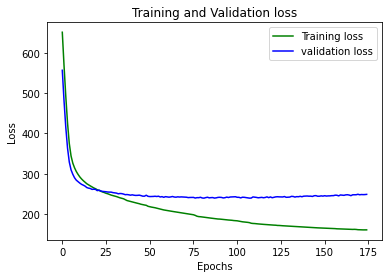

In [ ]:
trainer.train(num_epochs=175, lr=0.0008)
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)

---
#Extracting the updated expression matrix


In [ ]:
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)
oln1=output_layer_numpy[1]
l1=latent_layer_numpy[1]

In [ ]:
adata_sc=adata1.copy()
oln1 = np.array(oln1, dtype=float)
adata_sc.X = oln1

In [ ]:
adata_sc1=adata_sc.copy()


----

#Quality check after scScope

In [ ]:
a1=adata1.copy()
a2=adata_sc1.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

... storing 'CellType' as categorical


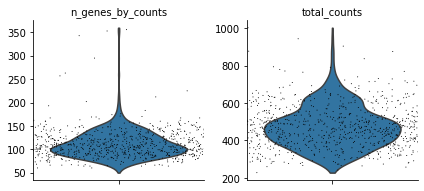

... storing 'CellType' as categorical


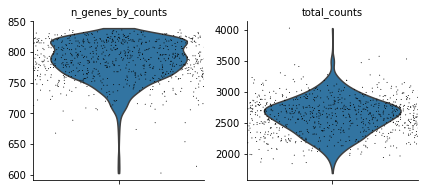

In [ ]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

Visualizing cell counts and no. fo genes expressed before and after applying scScope

* Blue : before application of scScope
* Red  : after application of scScope

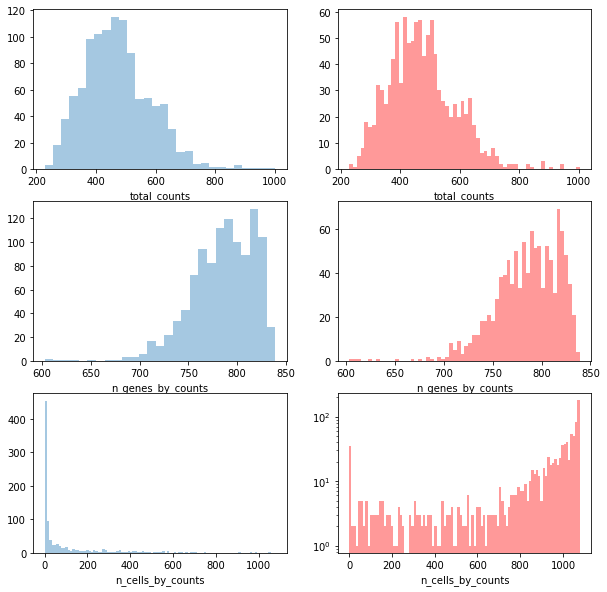

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets


... storing 'CellType' as categorical


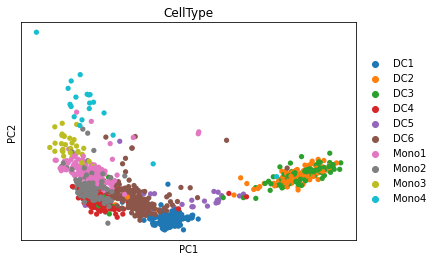

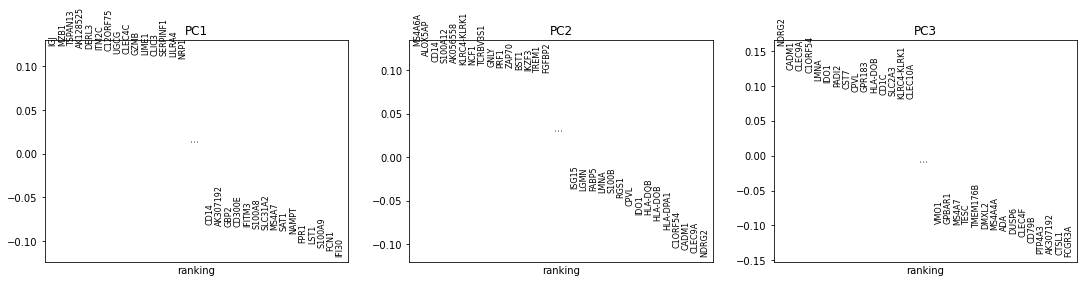

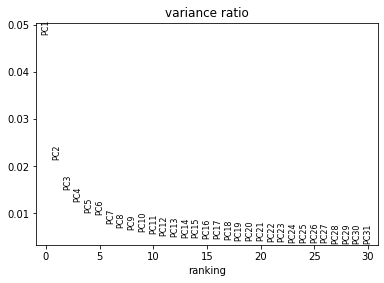

In [ ]:
sc.pp.log1p(adata1)#normalise
sc.pp.scale(adata1)#scale
sc.pp.pca(adata1) 
sc.pl.pca_overview(adata1,color='CellType')

... storing 'CellType' as categorical


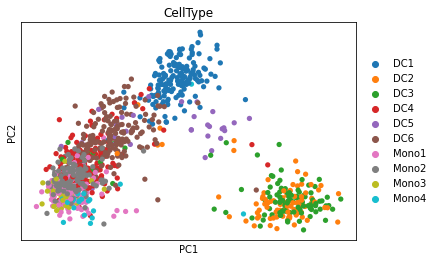

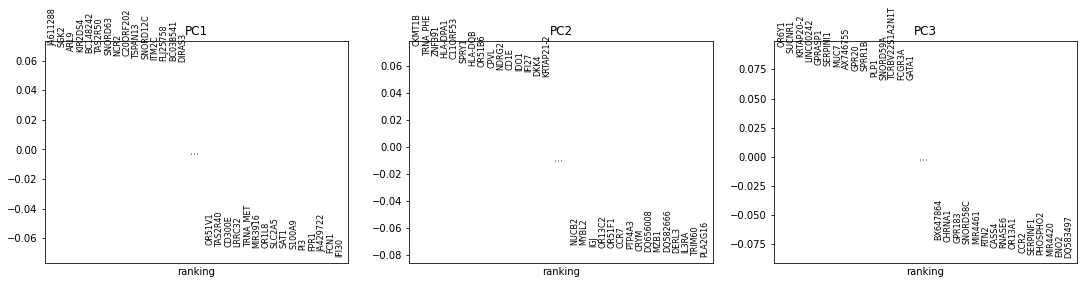

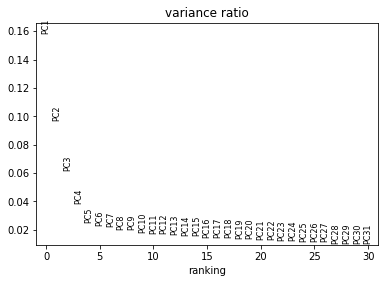

In [ ]:
sc.pp.log1p(adata_sc1)#normalise
sc.pp.scale(adata_sc1)#scale
sc.pp.pca(adata_sc1) 
sc.pl.pca_overview(adata_sc1, color='CellType')

#Dimensionality reduction

#1. tSNE 
visualing the data using tSNE before and after the model

In [ ]:
q1=adata1.copy()
q2=adata_sc1.copy()

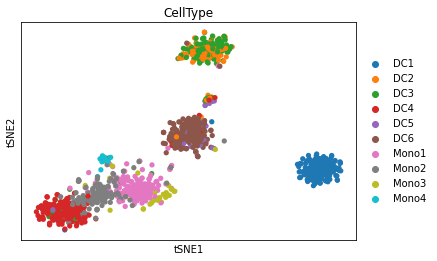

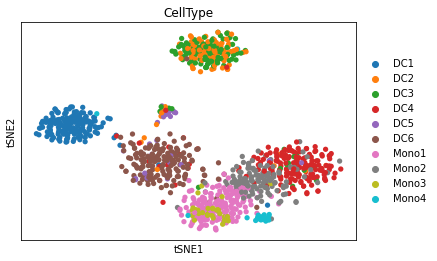

In [ ]:
sc.tl.tsne(q1, perplexity=30, learning_rate=1000, random_state=0)
sc.tl.tsne(q2, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(q1, color='CellType')
sc.pl.tsne(q2, color='CellType')

#2. UMAP
visualing the data using UMAP before and after the model




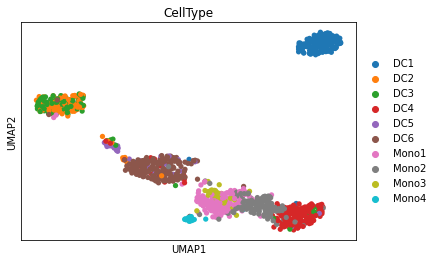

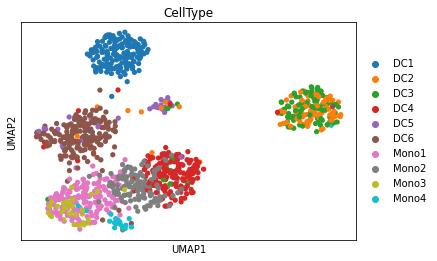

In [ ]:
sc.pp.neighbors(adata1)
sc.tl.umap(adata1, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pp.neighbors(adata_sc1)
sc.tl.umap(adata_sc1, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata1, color='CellType')
sc.pl.umap(adata_sc1, color='CellType')

#CLustering Analysis - using K-means




... storing 'kmeans' as categorical


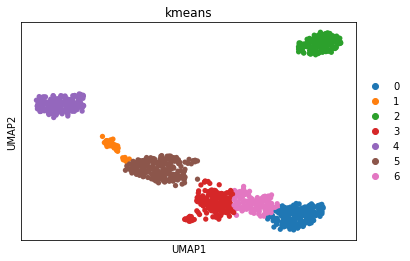

In [ ]:
umap_coordinates = adata1.obsm['X_umap'] 
kmeans = KMeans(n_clusters=7, random_state=0).fit(umap_coordinates) 

adata1.obs['kmeans'] = kmeans.labels_ 
adata1.obs['kmeans'] = adata1.obs['kmeans'].astype(str)

sc.pl.umap(adata1, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata1.obs['CellType'], labels_pred = adata1.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.68


... storing 'kmeans' as categorical


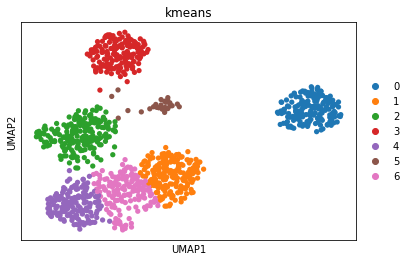

In [ ]:
umap_coordinates = adata_sc1.obsm['X_umap'] 
kmeans = KMeans(n_clusters=7, random_state=0).fit(umap_coordinates) 

adata_sc1.obs['kmeans'] = kmeans.labels_ 
adata_sc1.obs['kmeans'] = adata_sc1.obs['kmeans'].astype(str)

sc.pl.umap(adata_sc1, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata1.obs['CellType'], labels_pred = adata_sc1.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.64


#Additional visualisations to see effect of the model on the data:

# 1. TracksPlot


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


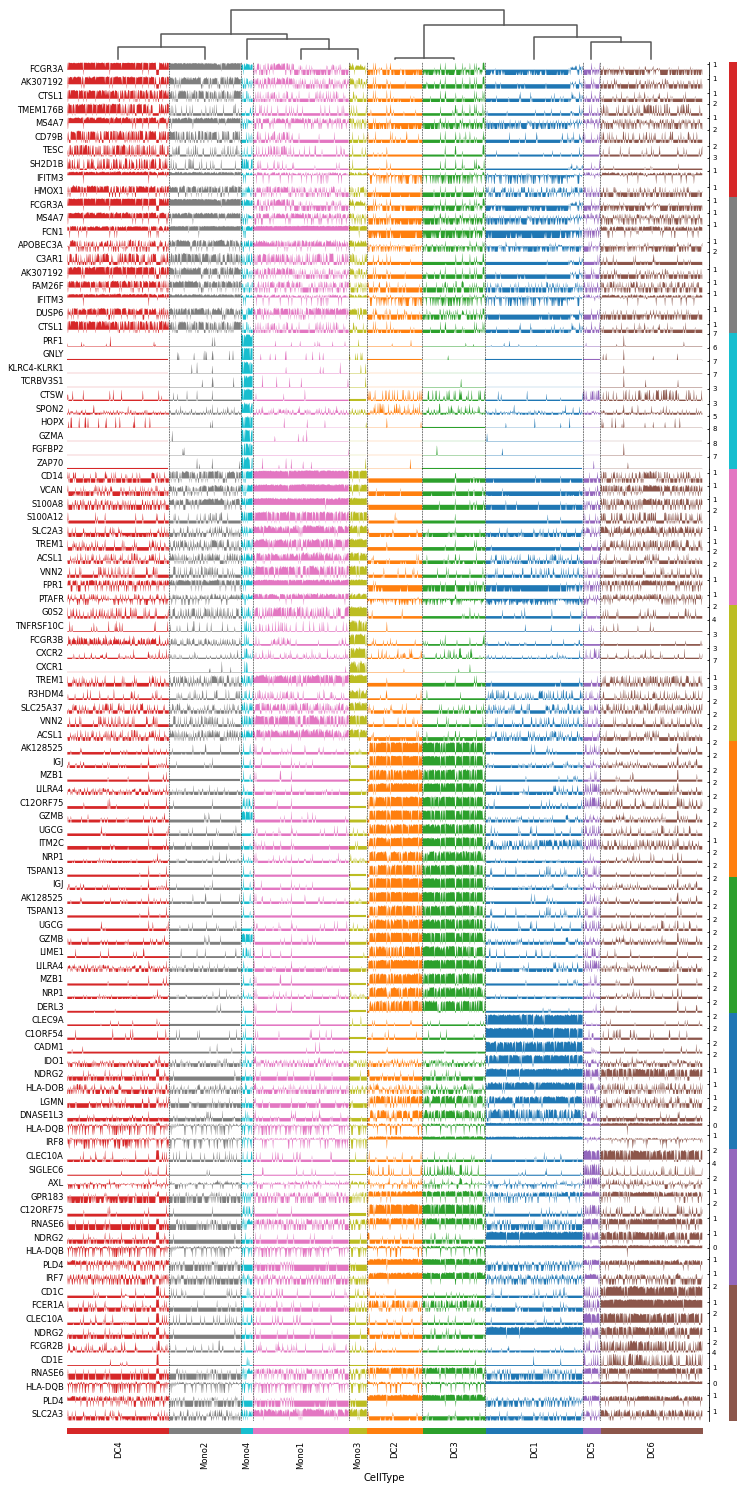

In [ ]:
sc.tl.rank_genes_groups(adata1, groupby='CellType', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata1, groupby='CellType') # plot the result

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


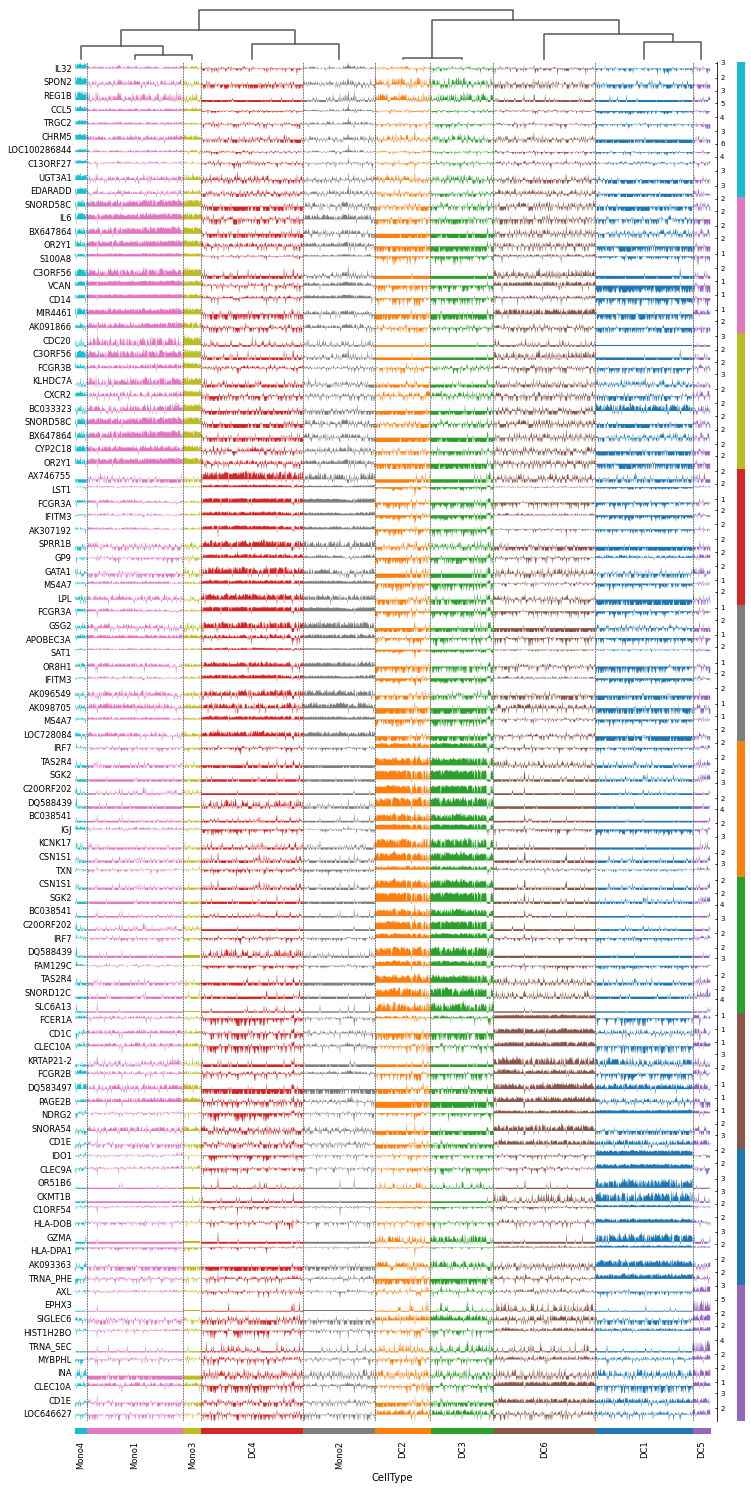

In [ ]:
sc.tl.rank_genes_groups(adata_sc1, groupby='CellType', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_sc1, groupby='CellType') # plot the result

# 2. Heatmaps

These hetamps clearly show that the noise is reduced significantly by the scScope model

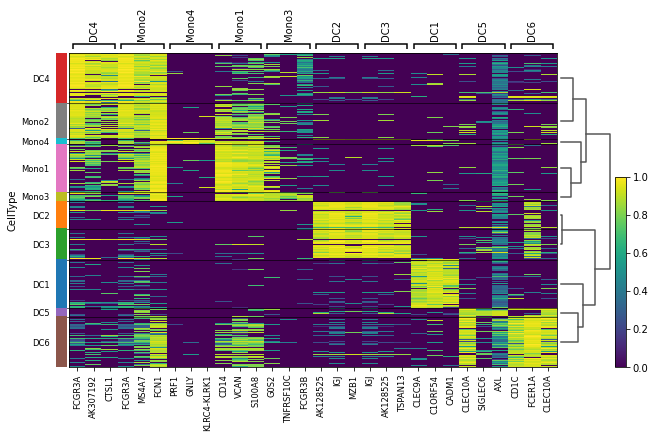

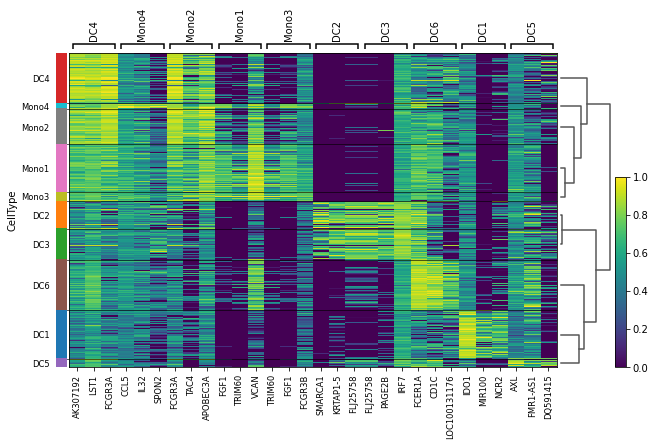

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata1, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_sc1, n_genes=3, standard_scale='var')

#Conclusions

The scScope model plays a good role in reeducing the noise in the data, however certain limitations exists like: quality and type of data highly affects the functioning of the model. To have an overall better result, we shall use this in combinantion with other models as this only reduces the noise in a data